# **Delhivery Case Study:**

# **About Delhivery:**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# **How can you help here?**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields.

• Make sense out of the raw data and help the data science team to build forecasting models on it.

# **Column Profiling:**

**data** - tells whether the data is testing or training data

**trip_creation_time** – Timestamp of trip creation

**route_schedule_uuid** – Unique Id for a particular route schedule

**route_type** – Transportation type

1. **FTL:** – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
2. **Carting:** Handling system consisting of small vehicles (carts)

**trip_uuid** - Unique ID given to a particular trip (A trip may include different source and destination centers)

**source_center** - Source ID of trip origin

**source_name** - Source Name of trip origin

**destination_cente** – Destination ID

**destination_name** – Destination Name

**od_start_time** – Trip start time

**od_end_time** – Trip end time

**start_scan_to_end_scan** – Time taken to deliver from source to destination

**is_cutoff** – Unknown field

**cutoff_factor** – Unknown field

**cutoff_timestamp** – Unknown field

**actual_distance_to_destination** – Distance in Kms between source and destination warehouse

**actual_time** – Actual time taken to complete the delivery (Cumulative)

**osrm_time** – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

**osrm_distance** – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

**factor** – Unknown field

**segment_actual_time** – This is a segment time. Time taken by the subset of the package delivery

**segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the package delivery

**segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of the package delivery

**segment_factor** – Unknown field

# **Part A: Import the dataset and Initial Analysis:**

https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

# **Part A1: Initial Analysis:**

In [1]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the delhivery dataset and create a dataframe for analysis. Print the first 5 rows
df = pd.read_csv("delhiverydata.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
# Print the last 5 rows
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [4]:
# Print the shape of the dataframe
df.shape

(144867, 24)

In [5]:
# Data type of the attributes of the dataframe
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [6]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [9]:
df.keys()

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [10]:
# Unique values for each feature
df.nunique()

# Alternate way to print number of unique values
# for col in df.columns:
#     print(col,':',df[col].nunique())

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [11]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [12]:
# Check for missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a dataFrame for better readability
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df

,Missing Values,Percentage (%)
data,0,0.000000
trip_creation_time,0,0.000000
route_schedule_uuid,0,0.000000
route_type,0,0.000000
trip_uuid,0,0.000000
source_center,0,0.000000
source_name,293,0.202254
destination_center,0,0.000000
destination_name,261,0.180165
od_start_time,0,0.000000


# **Part A2: Handle Missing Values:**

In [13]:
# Drop the missing values
df = df.dropna()

In [14]:
# Check for missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a dataFrame for better readability
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df

,Missing Values,Percentage (%)
data,0,0.0
trip_creation_time,0,0.0
route_schedule_uuid,0,0.0
route_type,0,0.0
trip_uuid,0,0.0
source_center,0,0.0
source_name,0,0.0
destination_center,0,0.0
destination_name,0,0.0
od_start_time,0,0.0


# **The dataset is clean with no duplicates and no missing values!**

# **Part A3: Further Data Cleaning: Separating data into Categorical and Numerical Data, DateTime Formatting and Merge Rows**

In [15]:
# Separate data in to Categorical Data And Numerical Data

# Separate column names by data type
numeric_columns = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include = ['object', 'bool']).columns.tolist()

# Print the results
print("Numeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)
df.shape

Numeric columns: ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

Categorical columns: ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'is_cutoff', 'cutoff_timestamp']


(144316, 24)

Skewness of numeric features before merging:
segment_factor                    47.336172
segment_osrm_distance             26.643163
segment_osrm_time                 19.705727
factor                            17.498068
segment_actual_time               16.820429
actual_time                        2.062382
osrm_distance                      2.042302
osrm_time                          2.039250
cutoff_factor                      1.986206
actual_distance_to_destination     1.985217
start_scan_to_end_scan             1.105346
dtype: float64


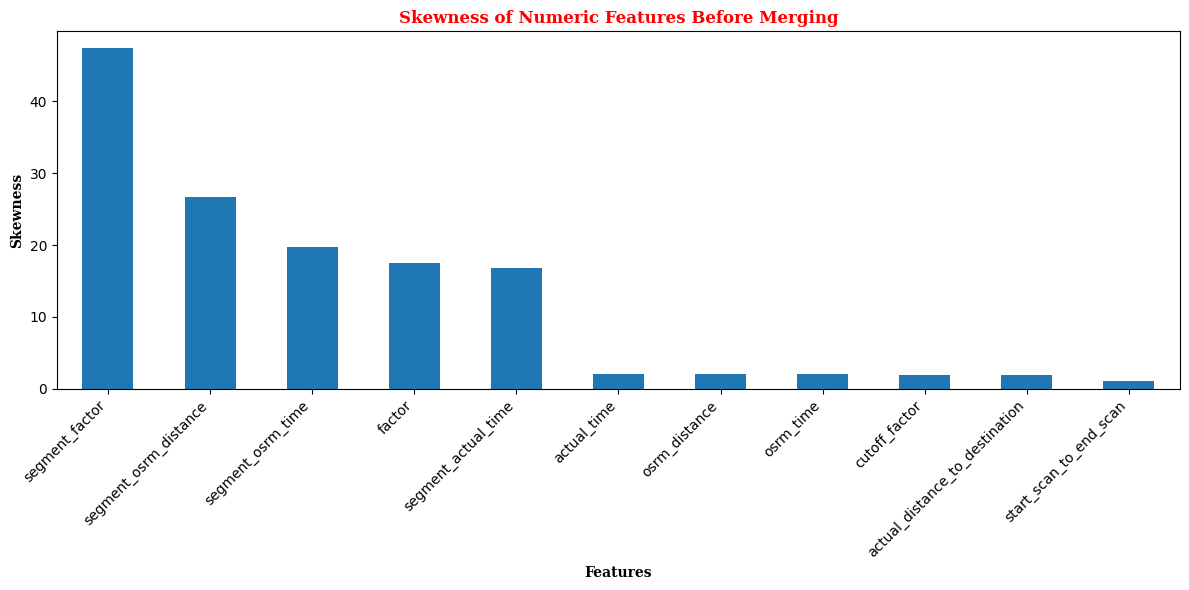

In [16]:
# Calculate skewness for numeric columns
skewness = df[numeric_columns].skew().sort_values(ascending = False)

print("Skewness of numeric features before merging:")
print(skewness)

# Visualize skewness
plt.figure(figsize = (12, 6))
skewness.plot(kind = 'bar')
plt.title('Skewness of Numeric Features Before Merging', fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Features', fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Skewness', fontweight = 'bold', fontname = 'Serif')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.grid(False)
plt.show()

In [17]:
# Datetime Formatting for datetime columns
# Convert object type To DateTime

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'], format='mixed')

In [18]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [19]:
# OD-pair level merge

# group by: trip_uuid, source_center, destination_center

# The logic:

# Keep first: data, trip_creation_time, route_schedule_uuid, route_type, source_name
# Keep last: destination_name
# Keep first/last timestamps: od_start_time → first, od_end_time → last
# Keep max : start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance
# Keep sum:  segment_actual_time, segment_osrm_time, segment_osrm_distance
# Keep first: Categorical: is_cutoff, cutoff_factor, cutoff_timestamp, factor

df_merge_od = df.groupby(
    ['trip_uuid', 'source_center', 'destination_center']
).agg(
    data                 = ('data', 'first'),
    trip_creation_time   = ('trip_creation_time', 'first'),
    route_schedule_uuid  = ('route_schedule_uuid', 'first'),
    route_type           = ('route_type', 'first'),

    source_name          = ('source_name', 'first'),
    destination_name     = ('destination_name', 'last'),

    od_start_time        = ('od_start_time', 'first'),
    od_end_time          = ('od_end_time', 'last'),

    start_scan_to_end_scan         = ('start_scan_to_end_scan', 'max'),
    actual_distance_to_destination = ('actual_distance_to_destination', 'max'),
    actual_time                    = ('actual_time', 'max'),
    osrm_time                      = ('osrm_time', 'max'),
    osrm_distance                  = ('osrm_distance', 'max'),

    segment_actual_time   = ('segment_actual_time', 'sum'),
    segment_osrm_time     = ('segment_osrm_time', 'sum'),
    segment_osrm_distance = ('segment_osrm_distance', 'sum'),

    is_cutoff        = ('is_cutoff', 'first'),
    cutoff_factor    = ('cutoff_factor', 'first'),
    cutoff_timestamp = ('cutoff_timestamp', 'first'),
    factor           = ('factor', 'first')
).reset_index()

In [20]:
df_merge_od

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,is_cutoff,cutoff_factor,cutoff_timestamp,factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,732.0,349.0,446.5496,728.0,534.0,670.6205,True,22,2018-09-13 12:40:43,1.515152
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,830.0,394.0,544.8027,820.0,474.0,649.8528,True,22,2018-09-12 14:56:29,1.102564
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,47.0,26.0,28.1994,46.0,26.0,28.1995,True,9,2018-09-12 02:41:24,1.800000
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,96.0,42.0,56.9116,95.0,39.0,55.9899,True,9,2018-09-12 01:39:28,1.750000
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,...,611.0,212.0,281.2109,608.0,231.0,317.7408,True,22,2018-09-14 16:54:36,1.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,...,51.0,41.0,42.5213,49.0,42.0,42.1431,True,9,2018-10-04 03:17:33,0.900000
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,...,90.0,48.0,40.6080,89.0,77.0,78.5869,True,9,2018-10-04 05:32:33,1.153846
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,30.0,14.0,16.0185,29.0,14.0,16.0184,True,9,2018-10-04 02:05:30,2.625000
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,233.0,42.0,52.5303,233.0,42.0,52.5303,True,22,2018-10-04 07:29:32,2.647059


In [21]:
# Trip-level merge: group by trip_uuid.

# Keep first: data, trip_creation_time, route_schedule_uuid, route_type, source_center, source_name
# Keep last: destination_center, destination_name, od_end_time
# Keep first/last timestamp: od_start_time
# Sum totals across OD-pairs: start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance
# Real trip sums from segment data: segment_actual_time, segment_osrm_time, segment_osrm_distance
# Categorical: is_cutoff, cutoff_factor, cutoff_timestamp, factor → keep first

df = df_merge_od.groupby('trip_uuid').agg(
    data               = ('data',                'first'),
    trip_creation_time = ('trip_creation_time',  'first'),
    route_schedule_uuid= ('route_schedule_uuid', 'first'),
    route_type         = ('route_type',          'first'),

    source_center      = ('source_center',       'first'),
    source_name        = ('source_name',         'first'),
    destination_center = ('destination_center',  'last'),
    destination_name   = ('destination_name',    'last'),

    od_start_time      = ('od_start_time',       'first'),
    od_end_time        = ('od_end_time',         'last'),

    start_scan_to_end_scan         = ('start_scan_to_end_scan', 'sum'),
    actual_distance_to_destination = ('actual_distance_to_destination', 'sum'),
    actual_time                    = ('actual_time', 'sum'),
    osrm_time                      = ('osrm_time', 'sum'),
    osrm_distance                  = ('osrm_distance', 'sum'),

    segment_actual_time   = ('segment_actual_time',   'sum'),
    segment_osrm_time     = ('segment_osrm_time',     'sum'),
    segment_osrm_distance = ('segment_osrm_distance', 'sum')
).reset_index()

In [22]:
df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_start_time                   14787 non-null  datetime64[ns]
 10  od_end_time                     14787 non-null  datetime64[ns]
 11  st

In [24]:
# Separate data in to Categorical Data And Numerical Data

# Separate column names by data type
numeric_columns = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include = ['object', 'bool']).columns.tolist()

# Print the results
print("Numeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)
df.shape

Numeric columns: ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

Categorical columns: ['trip_uuid', 'data', 'route_schedule_uuid', 'route_type', 'source_center', 'source_name', 'destination_center', 'destination_name']


(14787, 19)

Skewness of numeric features after merging:
segment_osrm_distance             3.714017
segment_osrm_time                 3.602915
actual_distance_to_destination    3.563838
osrm_distance                     3.555474
osrm_time                         3.463377
actual_time                       3.375178
segment_actual_time               3.372042
start_scan_to_end_scan            2.895337
dtype: float64


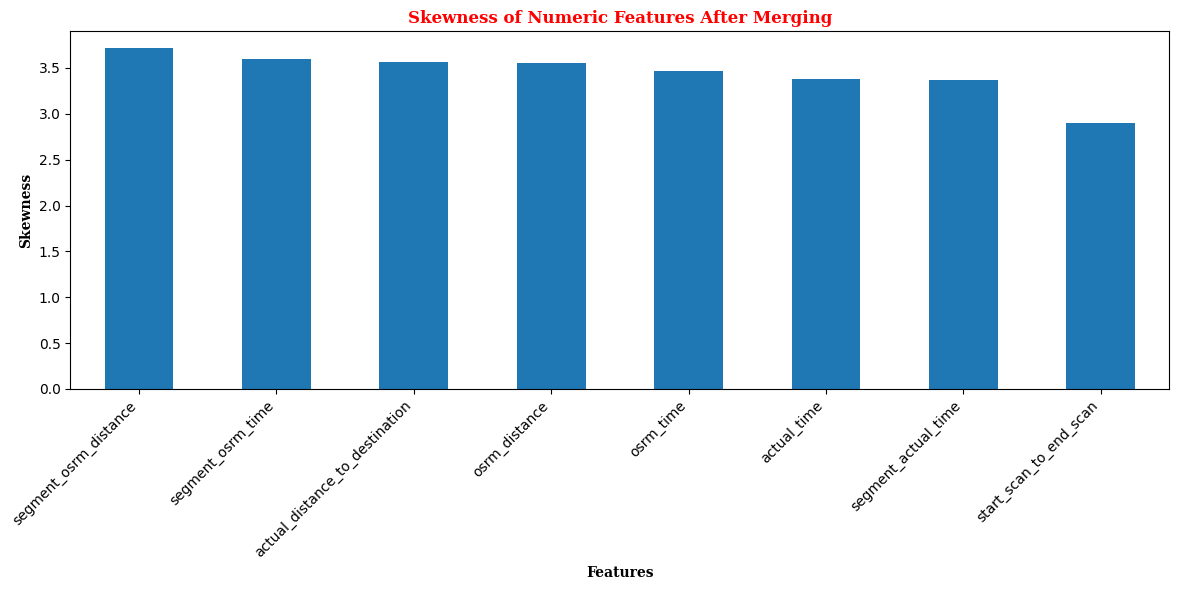

In [25]:
# Calculate skewness for numeric columns after merging
skewness = df[numeric_columns].skew().sort_values(ascending = False)

print("Skewness of numeric features after merging:")
print(skewness)

# Visualize skewness
plt.figure(figsize = (12, 6))
skewness.plot(kind = 'bar')
plt.title('Skewness of Numeric Features After Merging', fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Features', fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Skewness', fontweight = 'bold', fontname = 'Serif')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.grid(False)
plt.show()

### **The skewness of the features were very high before merging and the plot above shows that skewness is almost the same for the features after merging.**

# **Part B: Feature Creation**

# **Part B1: Extract Features: Build some features to prepare the data for actual analysis**

## **Destination Name: Split and extract features out of destination. City-place-code (State)**

In [26]:
df[['destination','destination_state']] = df['destination_name'].str.split('(', n = 1, expand = True)
df['destination_state'] = df['destination_state'].str.rstrip(')')
df[['destination_city','destination_place','destination_code']] = df['destination'].str.split('_', n = 2, expand=True)

## **Source Name: Split and extract features out of destination. City-place-code (State)**

In [27]:
df[['source','source_state']] = df['source_name'].str.split('(', n = 1, expand = True)
df['source_state'] = df['source_state'].str.rstrip(')')
df[['source_city','source_place','source_code']] = df['source'].str.split('_', n = 2, expand = True)

## **Trip_creation_time: Extract features like month, year and day etc**

In [28]:
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month_name()
df['trip_creation_day'] = df['trip_creation_time'].dt.day

In [29]:
df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_place,destination_code,source,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,Central,H_6,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,ChikaDPP,D,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,Bilaspur,HB,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,2018,September,12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,MiraRd,IP,Mumbai Hub,Maharashtra,Mumbai Hub,None,None,2018,September,12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,WrdN1DPP,D,Bellary_Dc,Karnataka,Bellary,Dc,None,2018,September,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Mehmdpur,H,Chandigarh_Mehmdpur_H,Punjab,Chandigarh,Mehmdpur,H,2018,October,3
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Blbgarh,DC,FBD_Balabhgarh_DPC,Haryana,FBD,Balabhgarh,DPC,2018,October,3
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,GovndNgr,DC,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Shnmgprm,D,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,October,3


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_start_time                   14787 non-null  datetime64[ns]
 10  od_end_time                     14787 non-null  datetime64[ns]
 11  st

# **Exploratory Data Analysis:**

Unique values in the data feature:  ['training' 'test']


Value counts of the data feature:
 data
training    10645
test         4142
Name: count, dtype: int64




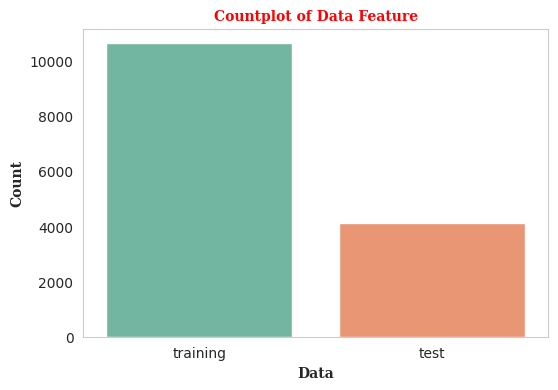

In [31]:
# Countplot of "Data" Feature

print("Unique values in the data feature: ", df['data'].unique())
print("\n")
print("Value counts of the data feature:\n", df['data'].value_counts())
print("\n")

plt.figure(figsize = (6,4))
sns.set_style("whitegrid")
sns.countplot(x = df['data'], palette = 'Set2')
plt.title("Countplot of Data Feature", fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel("Data", fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.ylabel("Count", fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **There's a lot more training data than testing data in the dataset.**

Unique values in the route type feature:  ['FTL' 'Carting']


Value counts of the route type feature:
 route_type
Carting    8906
FTL        5881
Name: count, dtype: int64




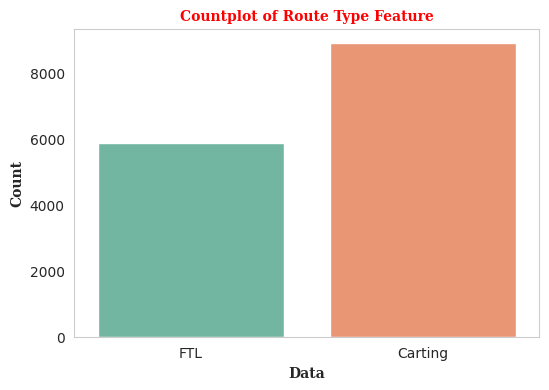

In [32]:
# Countplot of "route_type" Feature

print("Unique values in the route type feature: ", df['route_type'].unique())
print("\n")
print("Value counts of the route type feature:\n", df['route_type'].value_counts())
print("\n")

plt.figure(figsize = (6,4))
sns.set_style("whitegrid")
sns.countplot(x = df['route_type'], palette = 'Set2')
plt.title("Countplot of Route Type Feature", fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel("Data", fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.ylabel("Count", fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **Handling system consisting of small vehicles (carts) has more deliveries compared to Full Truck Load system.**

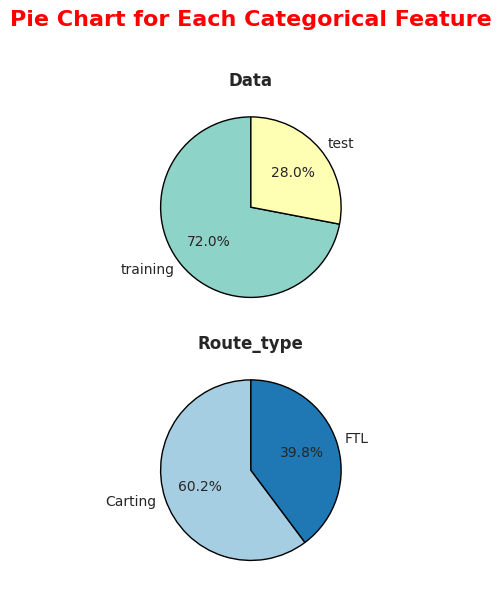

In [33]:
categorical_cols = ['data', 'route_type']

# Create a 1x1 grid
fig, axes = plt.subplots(2, 1, figsize = (8, 6))
axes = axes.flatten()

# Define color palettes for each plot
palettes = ['Set3', 'Paired']

# Loop through each categorical column
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot.pie(
        ax = axes[i],
        autopct = '%1.1f%%',
        startangle = 90,
        colors = sns.color_palette(palettes[i]),
        wedgeprops = {'edgecolor': 'black'}
    )
    axes[i].set_title(f'{col.capitalize()}', fontsize = 12, fontweight = 'bold')
    axes[i].set_ylabel('')  # remove redundant ylabel

# Add super title
fig.suptitle('Pie Chart for Each Categorical Feature', fontsize = 16, fontweight = 'bold', color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.grid(False)
plt.show()

### **Training data comprises of 72% of the data while testing data comprises of the remaining 28%. Also, the route type has around 60% of data with delivery through carting compared to around 40% of delivery through a full truck load.**

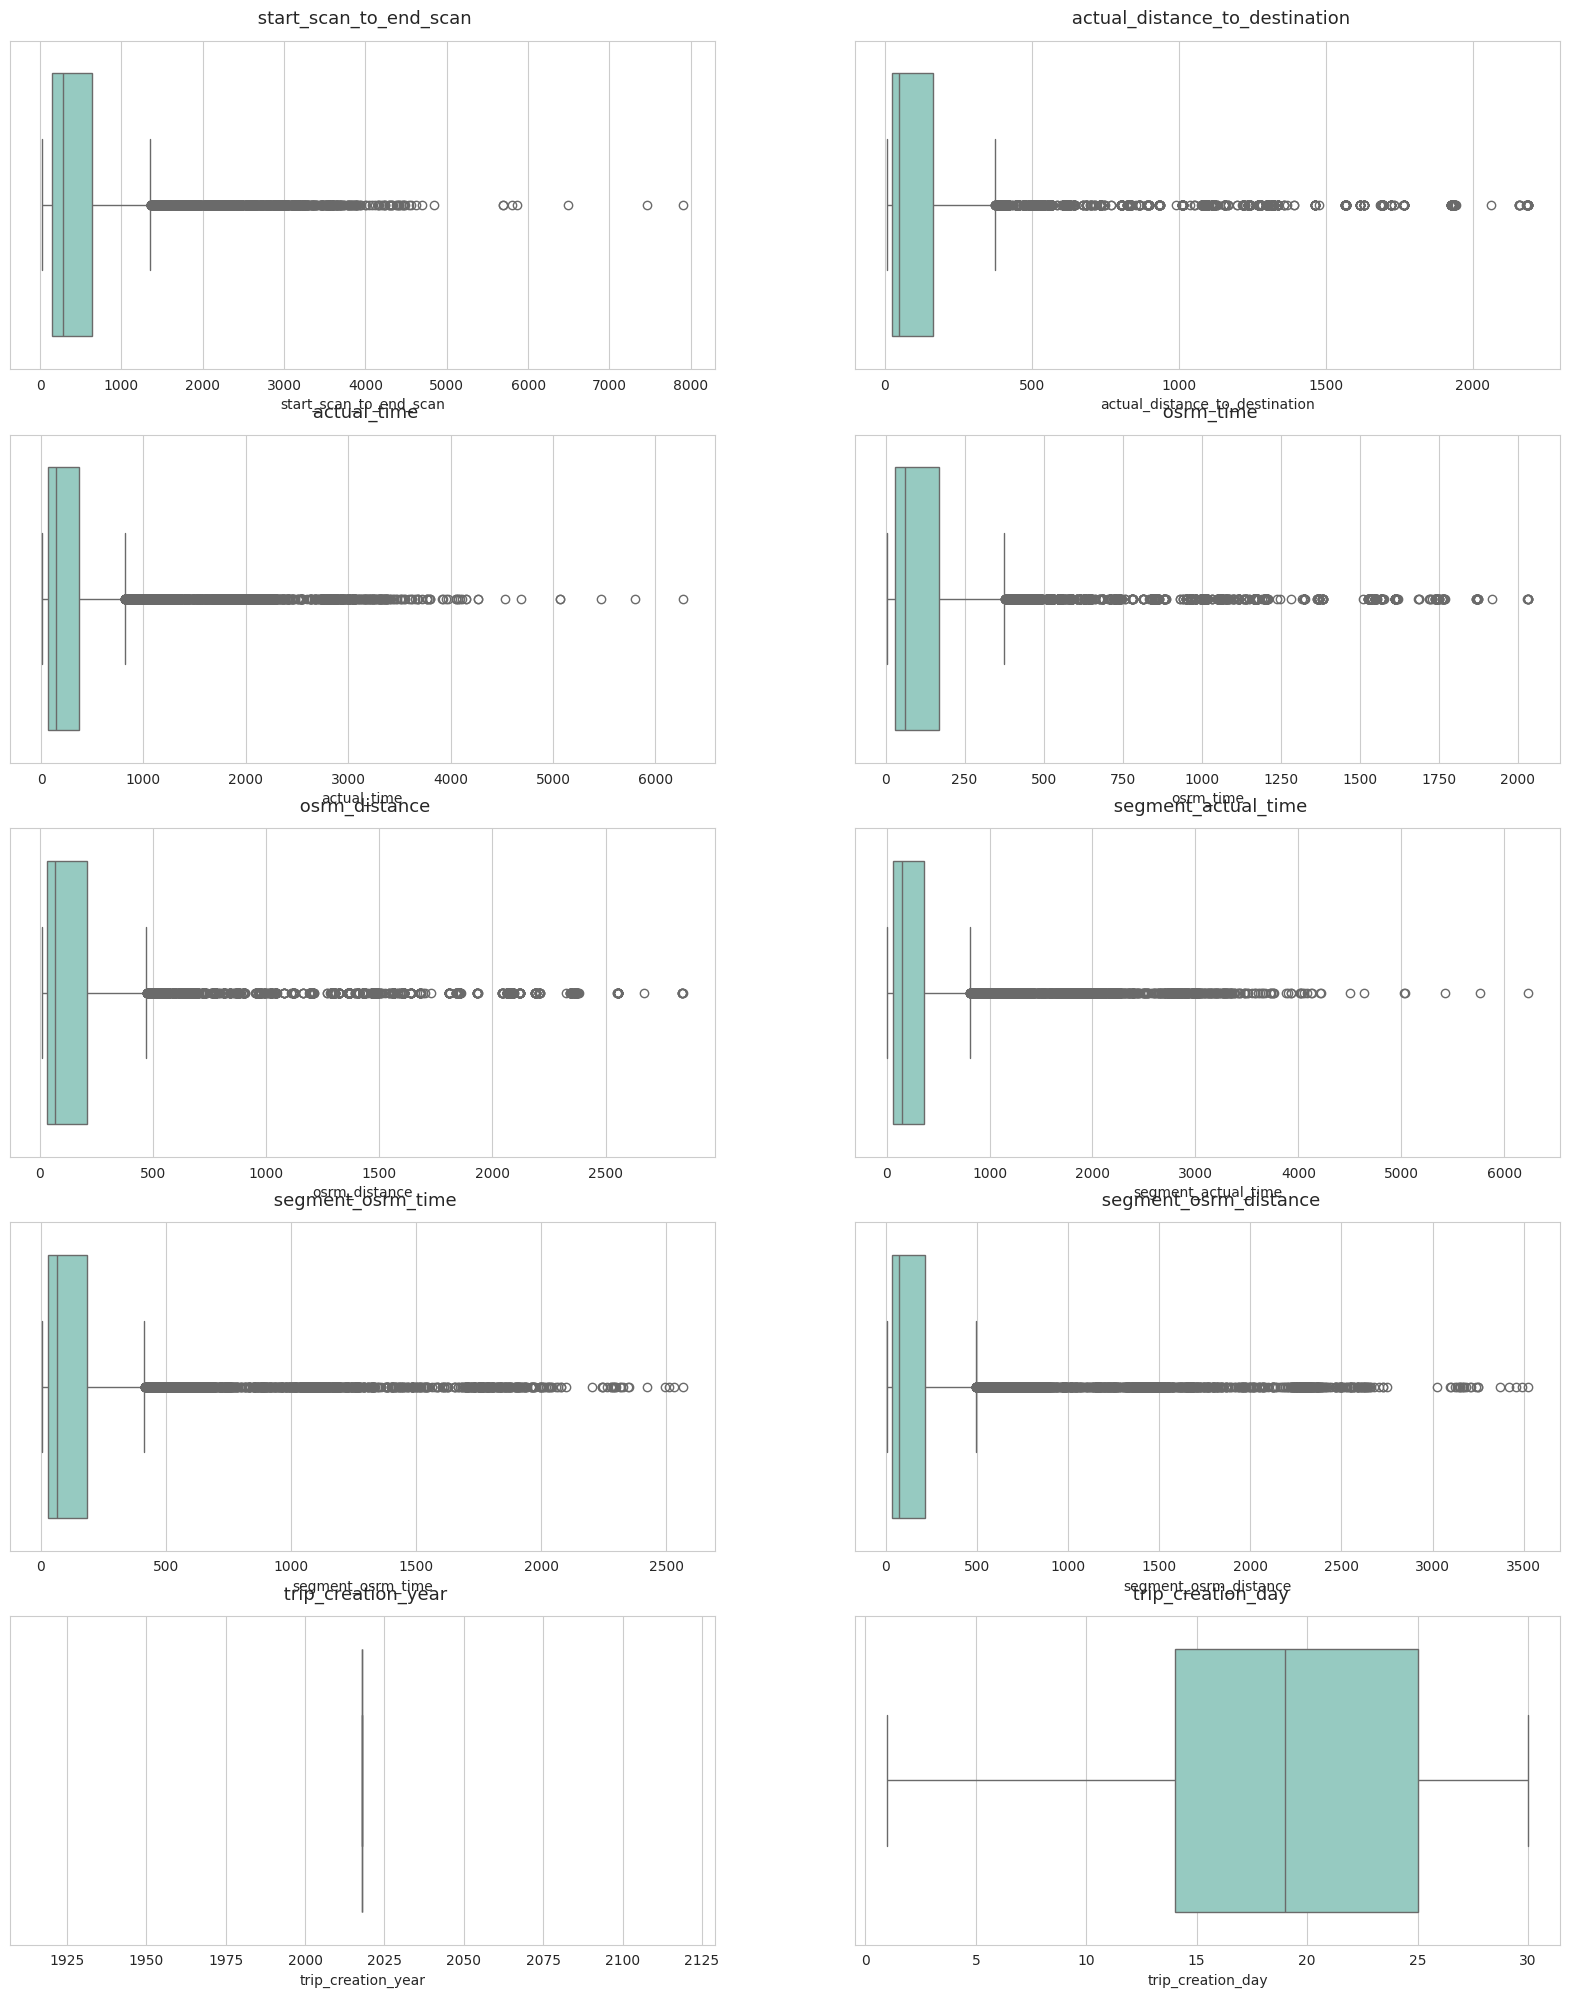

In [34]:
# Boxplot of Numerical Features

cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
        'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance', 'trip_creation_year',
        'trip_creation_day']

fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (20, 16))
fig.subplots_adjust(top = 1.3)
count = 0
for row in range(5):
    for col in range(2):
        sns.boxplot(data = df, x = cols[count], ax = axs[row, col], palette = 'Set3')
        axs[row,col].set_title(f" {cols[count]}", pad = 12, fontsize = 13)
        count += 1
plt.show()

### **There are many outliers in the numerical features of the dataset. Since the data is across the year 2018, the boxplot appears to be a vertical line.**

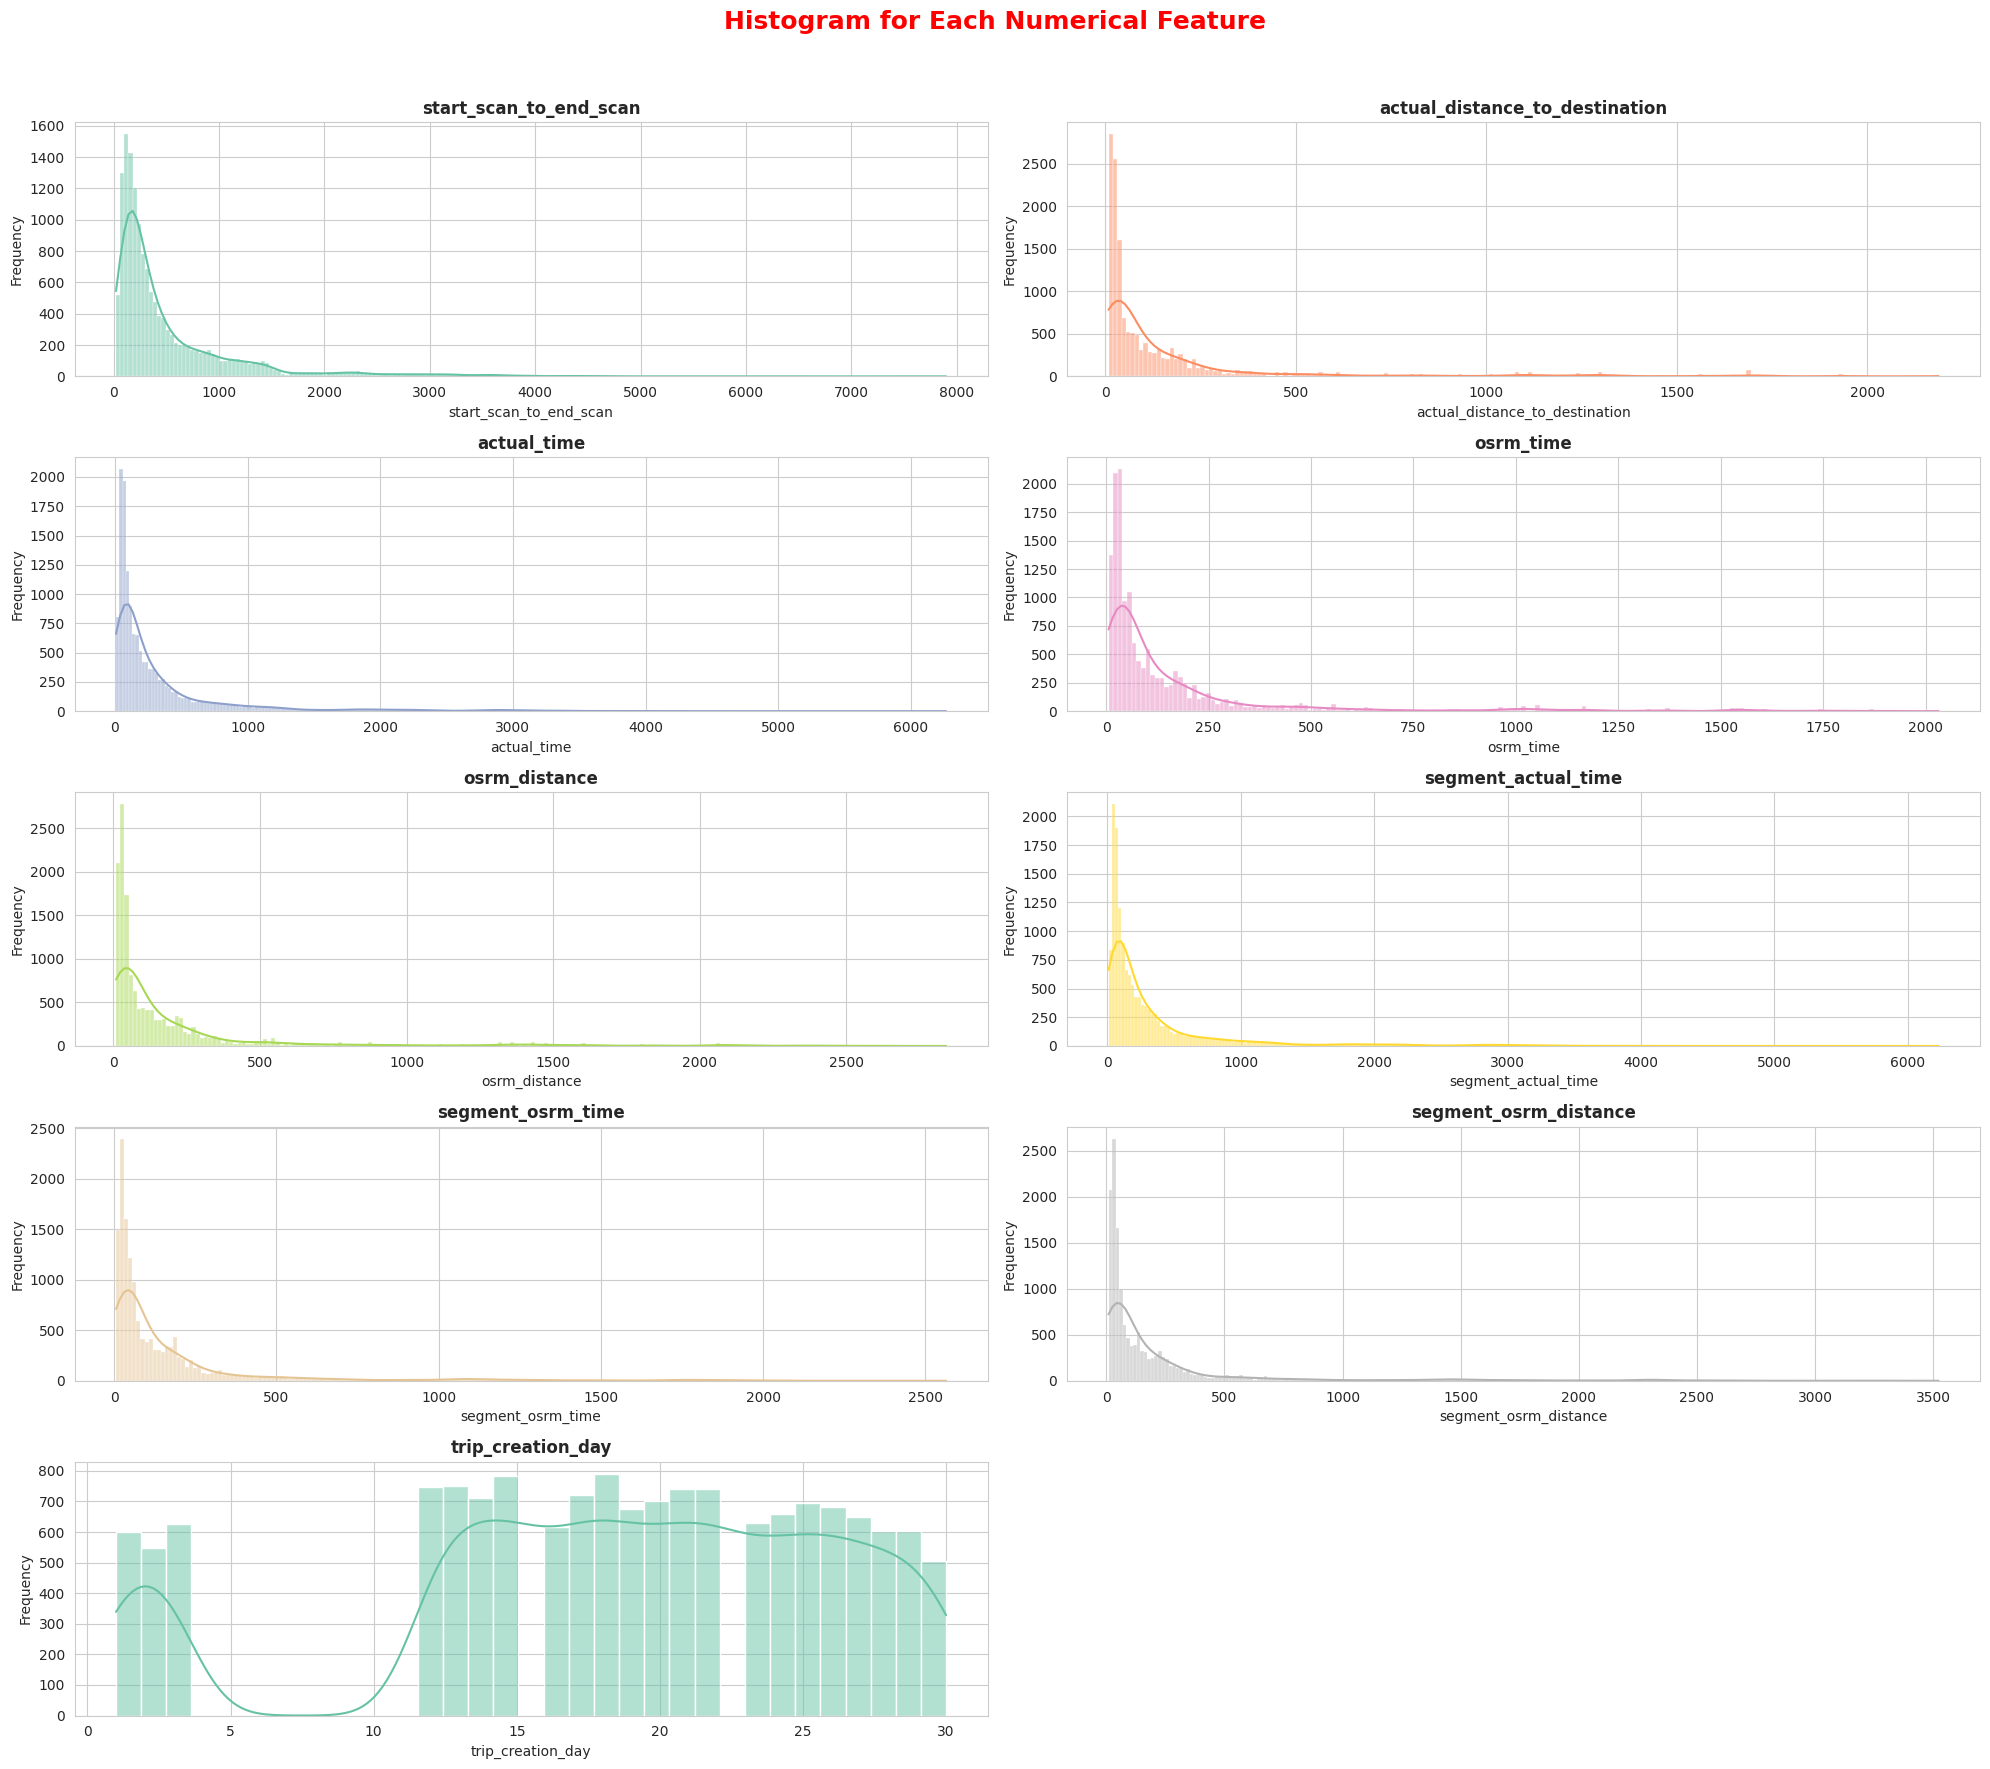

In [35]:
# Histplot of Numerical Features

numerical_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
                  'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance',
                  'trip_creation_day']

# Create a 5x2 grid
fig, axis = plt.subplots(nrows = 5, ncols = 2, figsize = (20, 18))
axis = axis.flatten()

# Define a list of colors
colors = sns.color_palette('Set2', len(numerical_cols))

# Plot histograms
for index in range(len(numerical_cols)):
    sns.histplot(df[numerical_cols[index]], ax = axis[index], kde = True, color = colors[index])
    axis[index].set_title(numerical_cols[index], fontweight = "bold", fontsize = 12)
    axis[index].set_ylabel("Frequency", fontsize = 10)

# Remove unused subplot (10th box since only 9 features)
for i in range(len(numerical_cols), len(axis)):
    fig.delaxes(axis[i])

# Add super title
fig.suptitle('Histogram for Each Numerical Feature', fontweight = "bold", fontsize = 18, color = 'red')

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

### **The features show right-skewed distribution.**

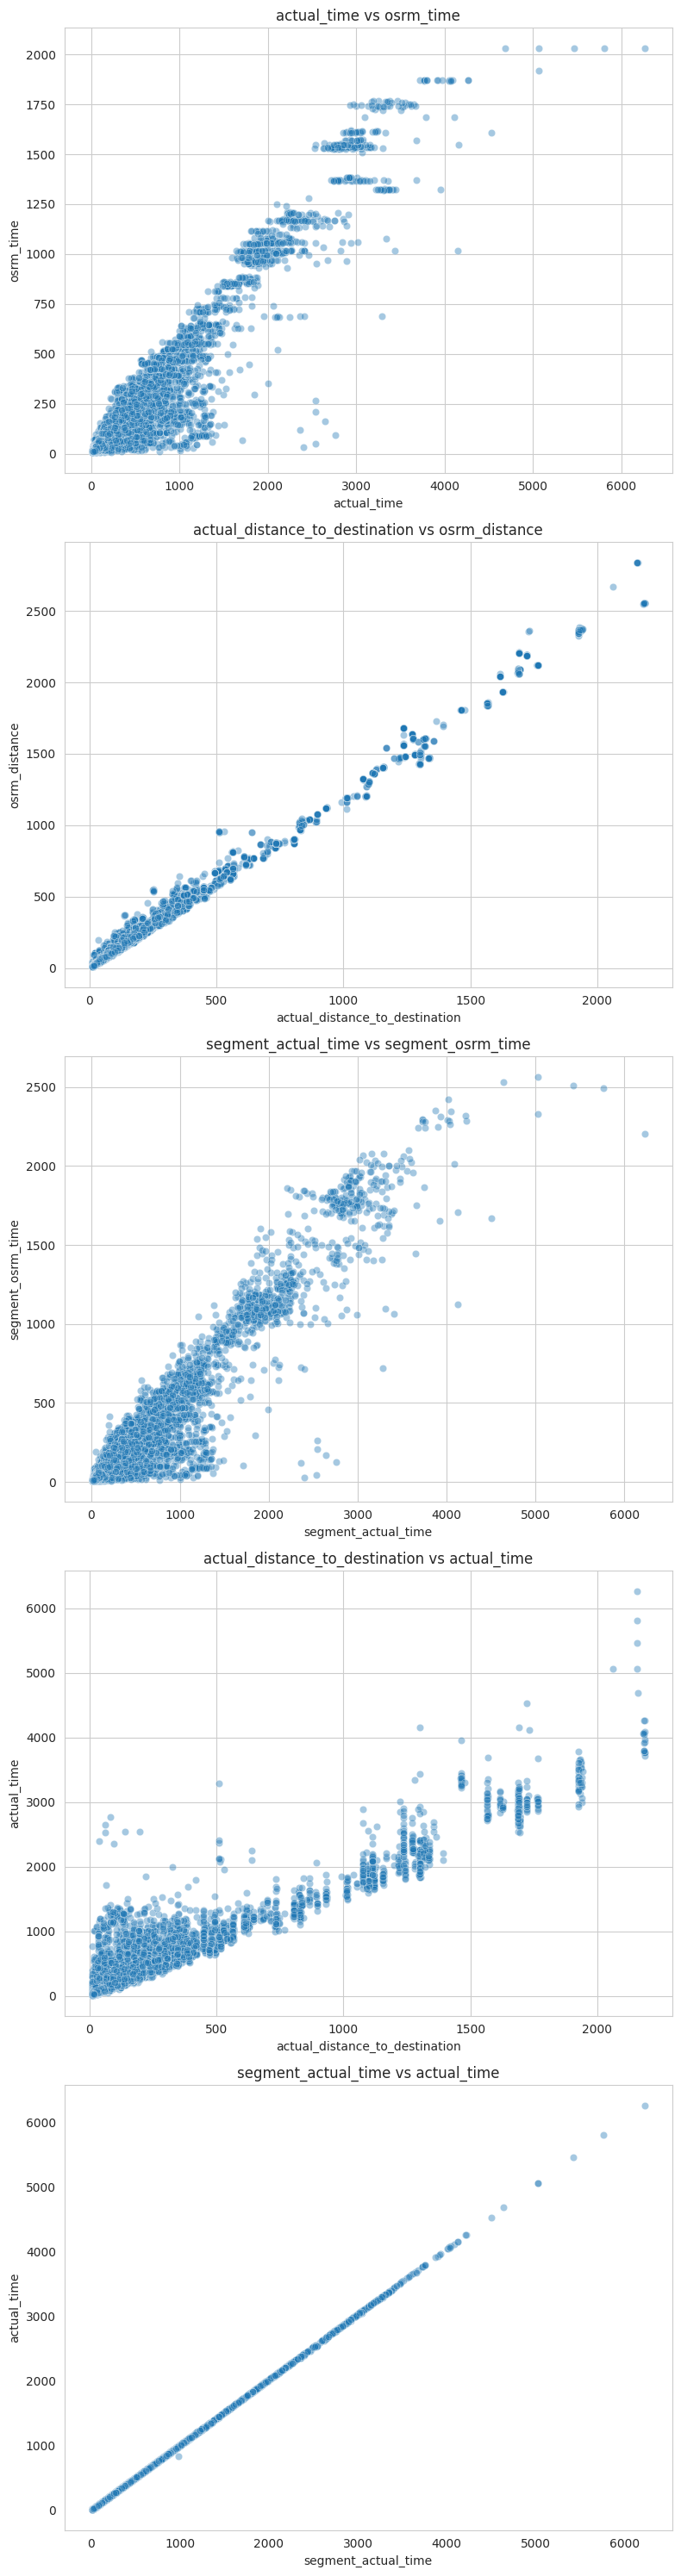

In [36]:
pairs = [
    ('actual_time', 'osrm_time'),
    ('actual_distance_to_destination', 'osrm_distance'),
    ('segment_actual_time','segment_osrm_time'),
    ('actual_distance_to_destination', 'actual_time'),
    ('segment_actual_time', 'actual_time')]

fig, axes = plt.subplots(nrows = len(pairs), ncols = 1, figsize = (8, 6 * len(pairs)))

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(x = df[x], y = df[y], alpha = 0.4, ax = axes[i])
    axes[i].set_title(f"{x} vs {y}")

plt.tight_layout()
plt.grid(False)
plt.show()

### **The pairs shown in the plot display positive correlation behaviour.**
    ('actual_time', 'osrm_time'),
    ('actual_distance_to_destination', 'osrm_distance'),
    ('segment_actual_time','segment_osrm_time'),
    ('actual_distance_to_destination', 'actual_time'),
    ('segment_actual_time', 'actual_time')

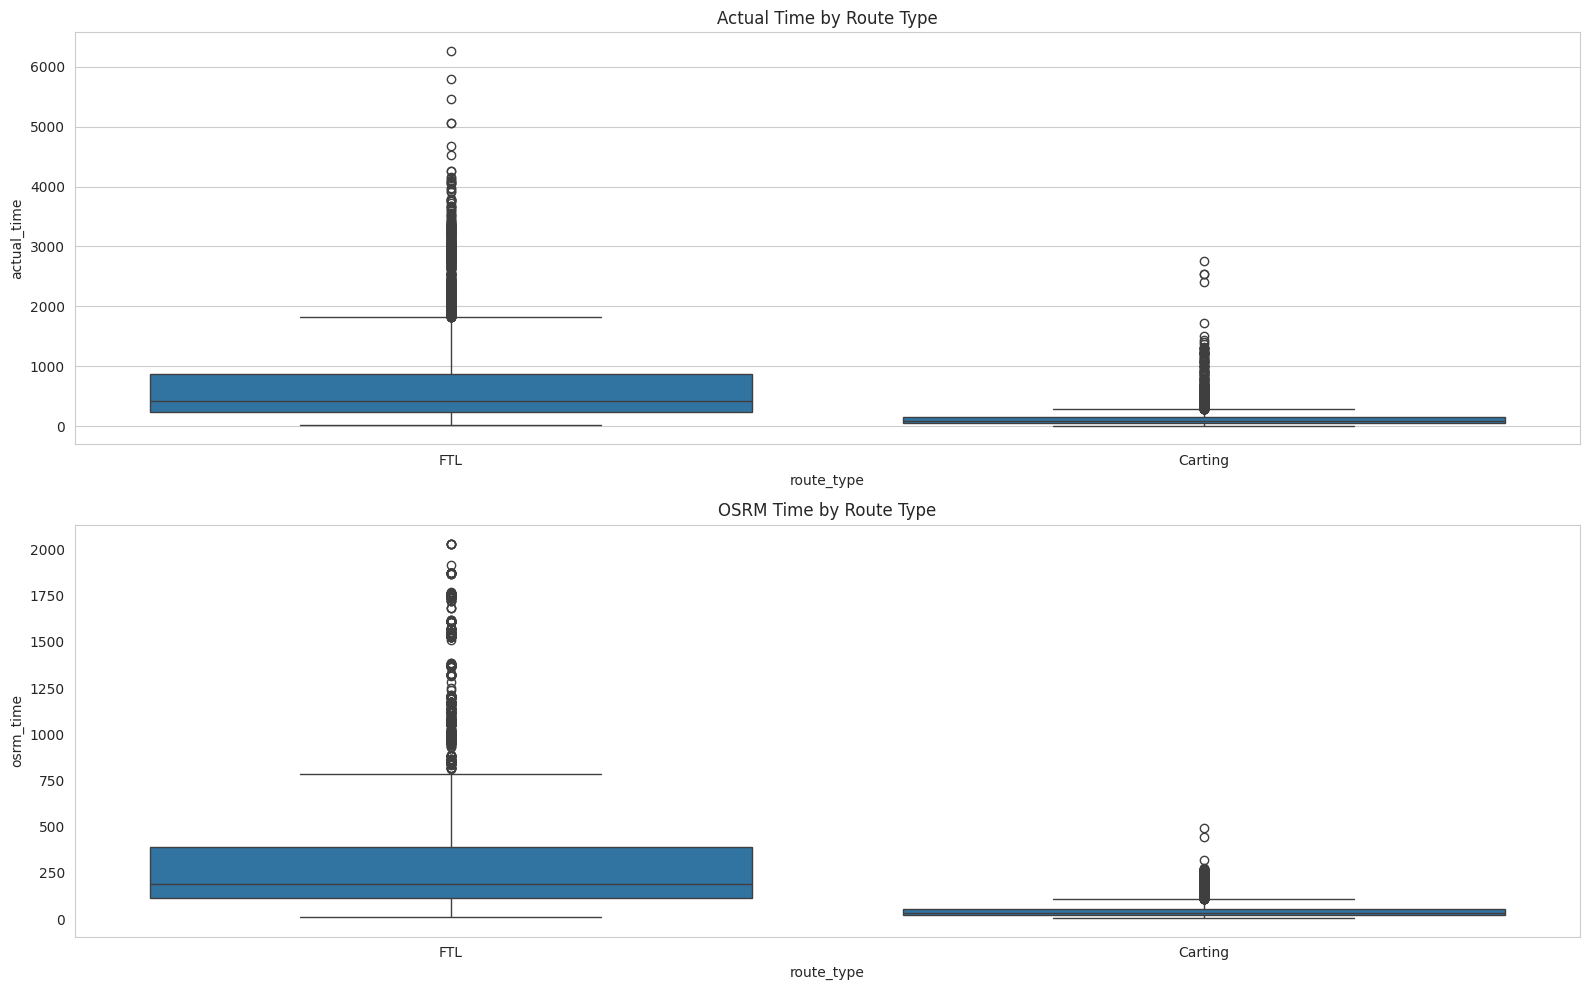

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))
axes = axes.flatten()

sns.boxplot(x = 'route_type', y = 'actual_time', data = df, ax = axes[0])
axes[0].set_title("Actual Time by Route Type")

sns.boxplot(x = 'route_type', y = 'osrm_time', data = df, ax = axes[1])
axes[1].set_title("OSRM Time by Route Type")

plt.tight_layout()
plt.grid(False)
plt.show()

### **Route type vs actual time and route type vs osrm time display several outlier values indicating right skewness.**

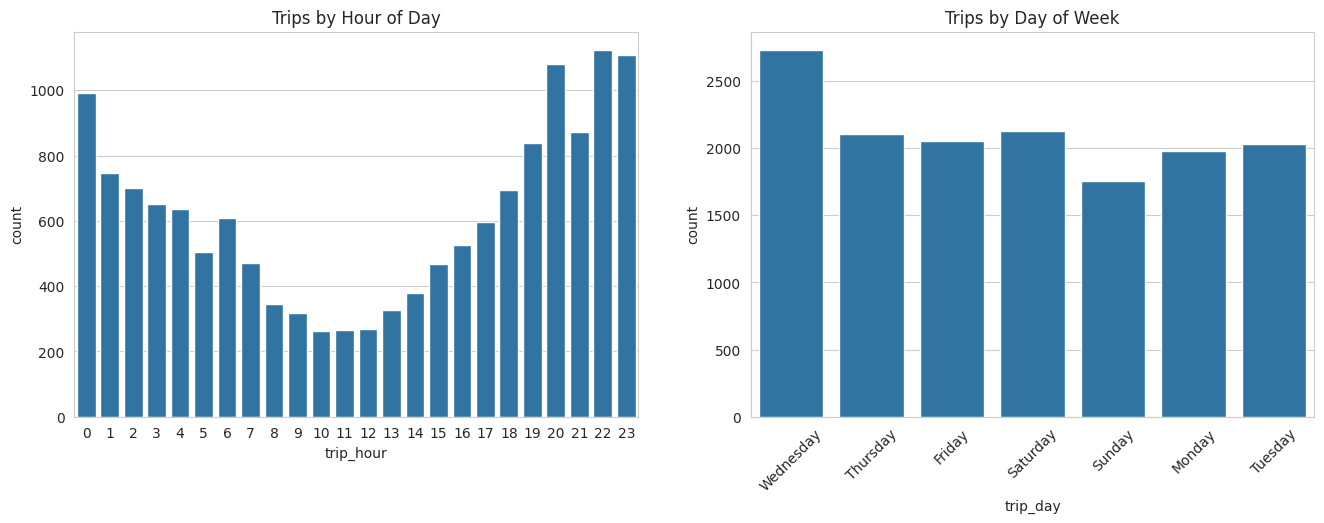

In [38]:
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_day'] = df['trip_creation_time'].dt.day_name()

fig, ax = plt.subplots(1, 2, figsize = (16,5))

sns.countplot(x = df['trip_hour'], ax = ax[0])
ax[0].set_title("Trips by Hour of Day")

sns.countplot(x = df['trip_day'], ax = ax[1])
ax[1].set_title("Trips by Day of Week")
ax[1].tick_params(axis = 'x', rotation = 45)

plt.show()

### **Highest number of trips were completed on Wednesday and the least on Sunday indicating that the order delivers are preferred on weekdays by the customers.**

### **More trips were completed during mornings and evening onwards indicating fewer deliveries during peak hours of the day due to traffic and various other factors.**

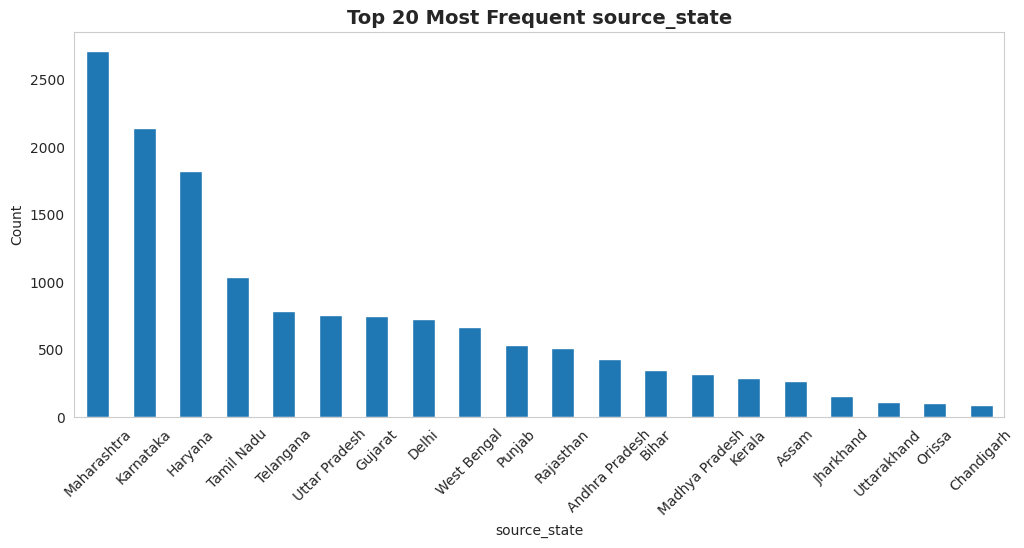

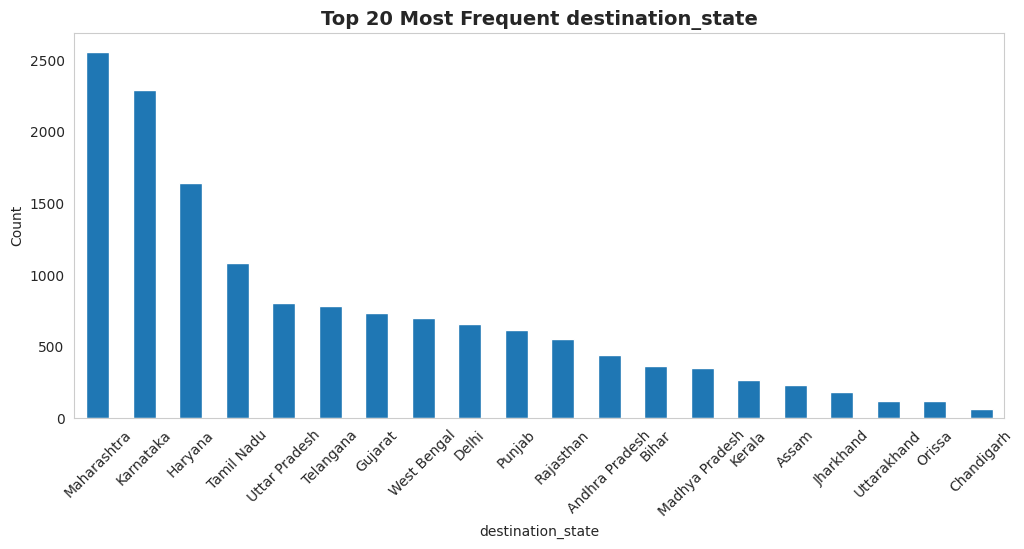

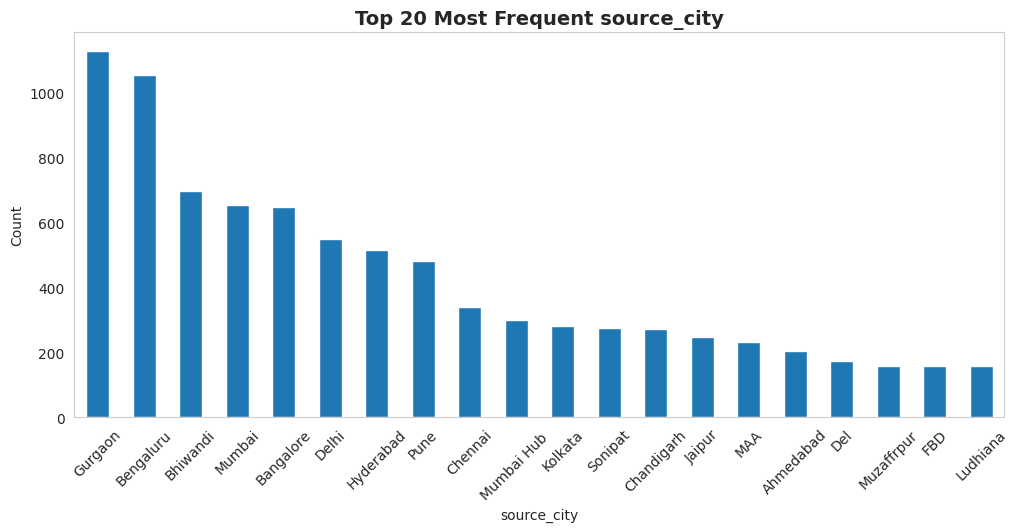

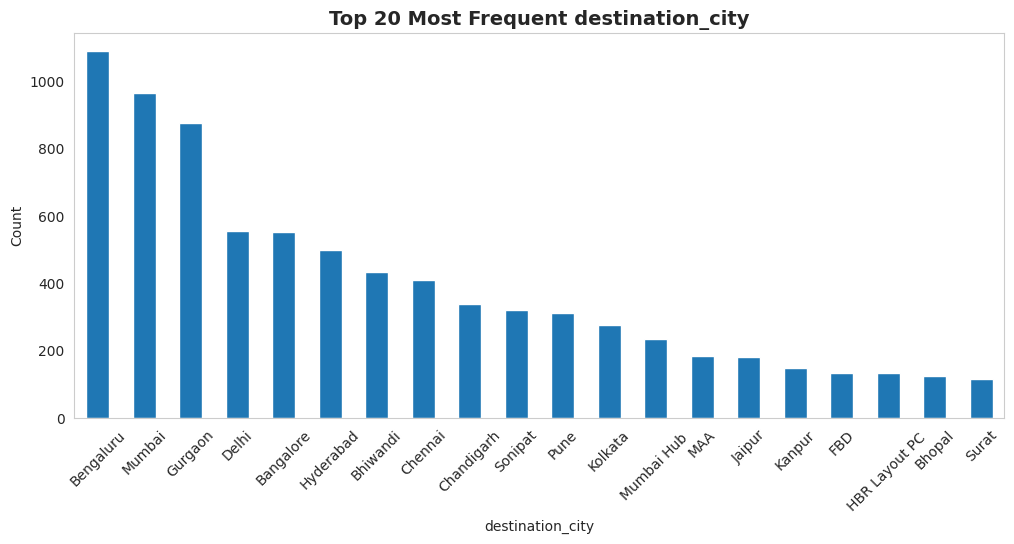

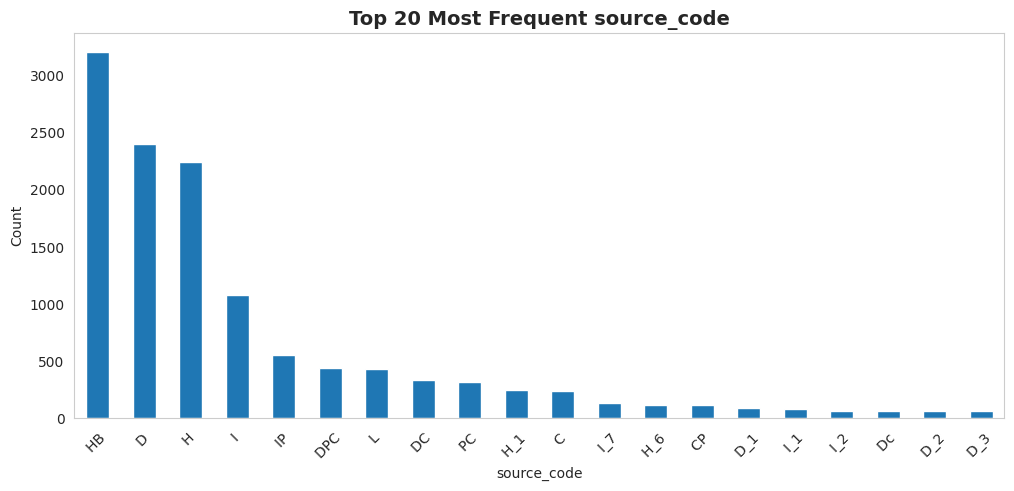

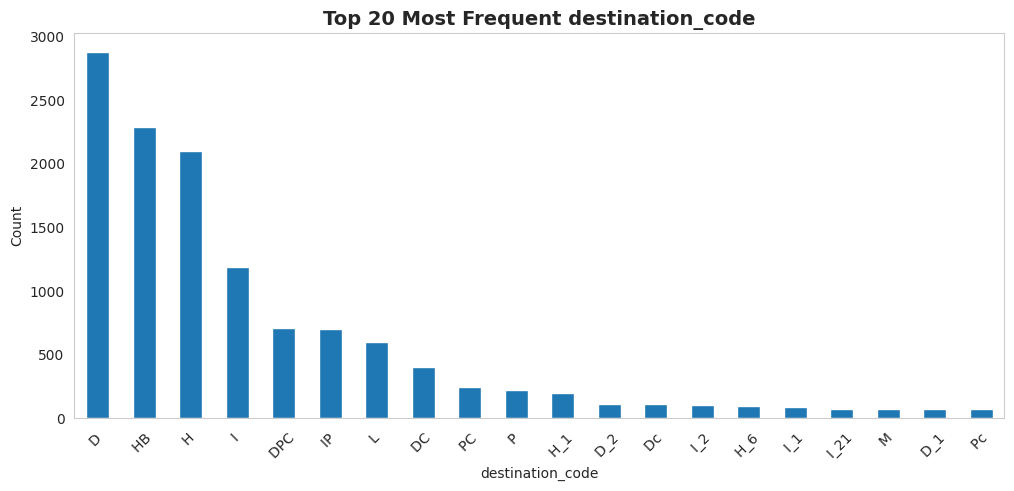

In [39]:
cols = ['source_state', 'destination_state', 'source_city', 'destination_city', 'source_code', 'destination_code']

for col in cols:
    plt.figure(figsize = (12,5))
    df[col].value_counts().head(20).plot(kind = 'bar')
    plt.title(f"Top 20 Most Frequent {col}", fontsize = 14, fontweight = 'bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.grid(False)
    plt.show()

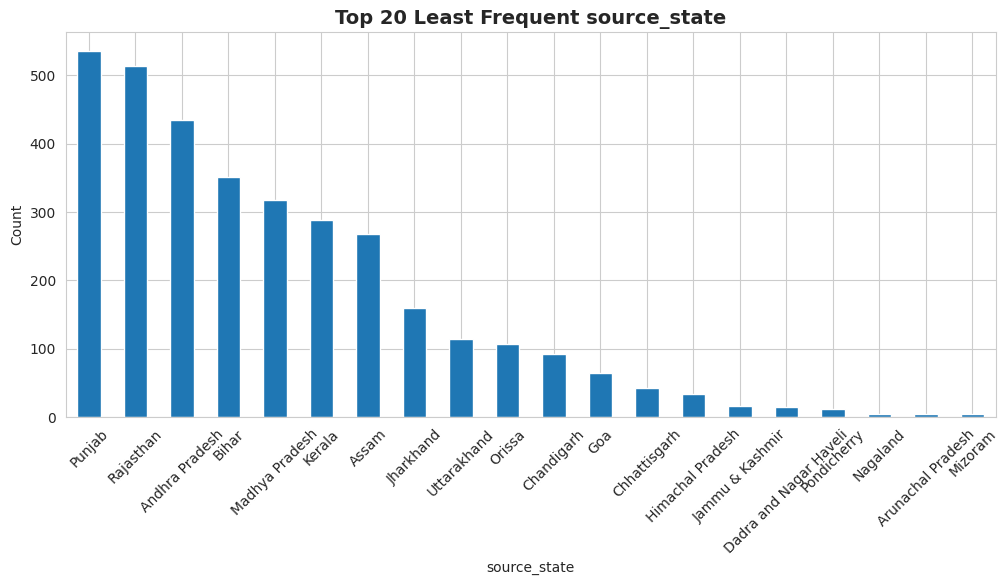

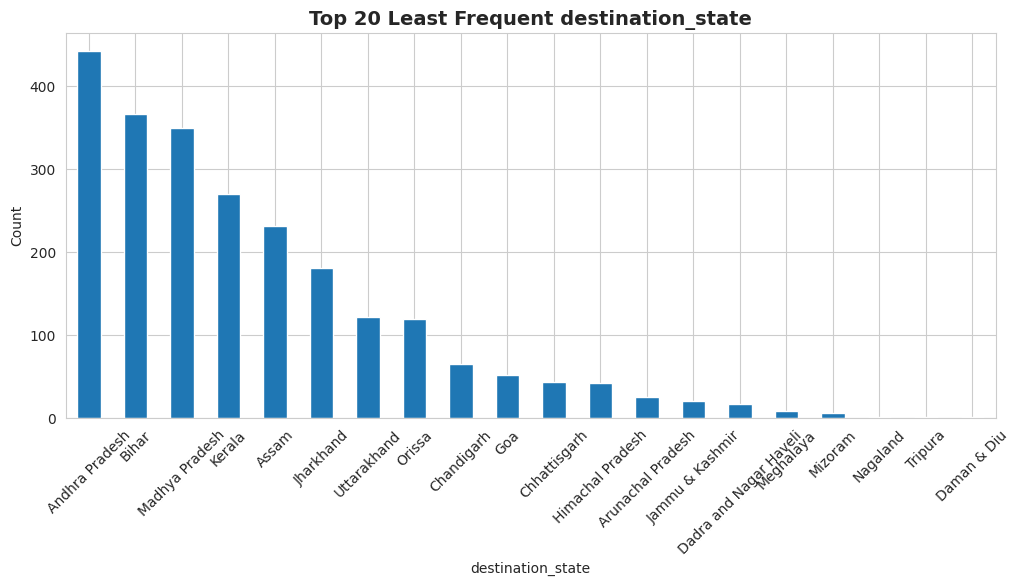

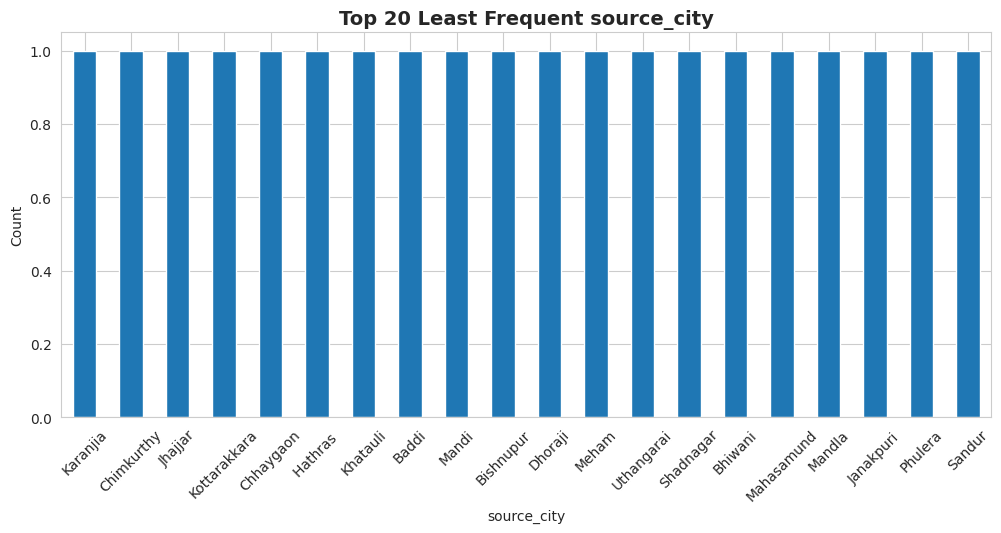

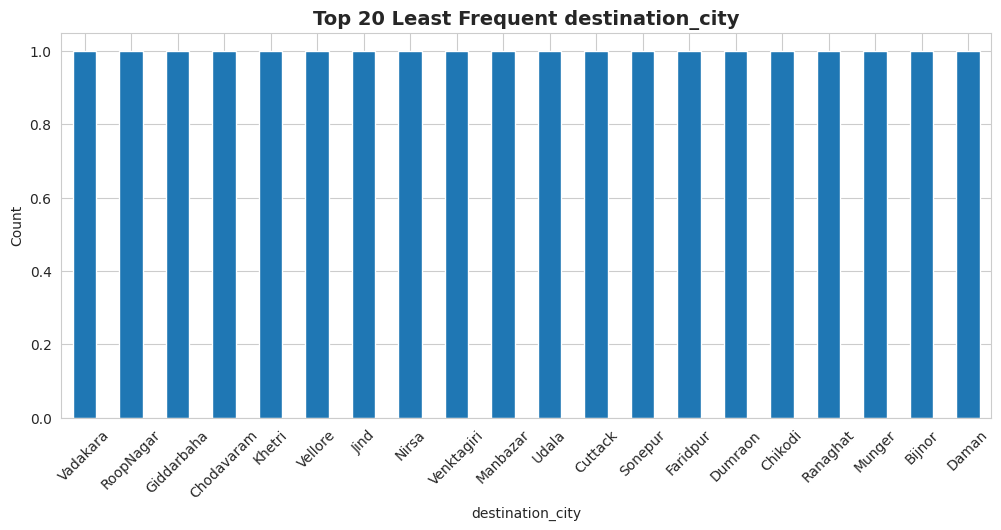

In [40]:
cols = ['source_state', 'destination_state', 'source_city', 'destination_city']

for col in cols:
    plt.figure(figsize = (12,5))
    df[col].value_counts().tail(20).plot(kind = 'bar')
    plt.title(f"Top 20 Least Frequent {col}", fontsize = 14, fontweight = 'bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.show()

In [41]:
cols = ['trip_uuid', 'route_schedule_uuid',
        'source_name', 'destination_name',
        'source_place', 'destination_place',
        'source_code', 'destination_code']

for col in cols:
    print("\n" + "="*50)
    print(f"TOP 10 FREQUENCIES OF {col}")
    print(df[col].value_counts().head(10))
    print(f"\nBOTTOM 10 FREQUENCIES OF {col}")
    print(df[col].value_counts().tail(10))


TOP 10 FREQUENCIES OF trip_uuid
trip_uuid
trip-153861118270144424    1
trip-153671041653548748    1
trip-153671042288605164    1
trip-153861034802474617    1
trip-153861033690433192    1
trip-153861028301961630    1
trip-153861023893369544    1
trip-153861022636573944    1
trip-153861014185597051    1
trip-153861007249500192    1
Name: count, dtype: int64

BOTTOM 10 FREQUENCIES OF trip_uuid
trip_uuid
trip-153671117375890592    1
trip-153671110078355292    1
trip-153671090980523004    1
trip-153671079956500691    1
trip-153671074033284934    1
trip-153671066826362165    1
trip-153671066201138152    1
trip-153671055416136166    1
trip-153671052974046625    1
trip-153671046011330457    1
Name: count, dtype: int64

TOP 10 FREQUENCIES OF route_schedule_uuid
route_schedule_uuid
thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6    53
thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5fca03    46
thanos::sroute:c736b86f-5c1d-4497-832c-876db4c1a518    43
thanos::sroute:ca336899-47aa-4622-9885-b9f

In [42]:
group_cols = ['trip_uuid', 'route_schedule_uuid',
              'source_name', 'destination_name',
              'source_place', 'destination_place',
              'source_code', 'destination_code']

for col in group_cols:
    print("\n" + "="*60)
    print(f"TOP 10 GROUPS OF {col} BASED ON trip_uuid COUNT")
    top_10 = df.groupby(col)['trip_uuid'].count().sort_values(ascending = False).head(10)
    print(top_10)

    print(f"\nBOTTOM 10 GROUPS OF {col} BASED ON trip_uuid COUNT")
    bottom_10 = df.groupby(col)['trip_uuid'].count().sort_values(ascending = True).head(10)
    print(bottom_10)


TOP 10 GROUPS OF trip_uuid BASED ON trip_uuid COUNT
trip_uuid
trip-153861118270144424    1
trip-153671041653548748    1
trip-153671042288605164    1
trip-153861034802474617    1
trip-153861033690433192    1
trip-153861028301961630    1
trip-153861023893369544    1
trip-153861022636573944    1
trip-153861014185597051    1
trip-153861007249500192    1
Name: trip_uuid, dtype: int64

BOTTOM 10 GROUPS OF trip_uuid BASED ON trip_uuid COUNT
trip_uuid
trip-153861104386292051    1
trip-153861095625827784    1
trip-153861091843037040    1
trip-153861090163768194    1
trip-153861089872028474    1
trip-153861089559302126    1
trip-153861089403973335    1
trip-153861075467184898    1
trip-153861073259859847    1
trip-153861059679001096    1
Name: trip_uuid, dtype: int64

TOP 10 GROUPS OF route_schedule_uuid BASED ON trip_uuid COUNT
route_schedule_uuid
thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6    53
thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5fca03    46
thanos::sroute:c736b86f-5c1d-449

In [43]:
cols = ['source_state', 'destination_state', 'source_city', 'destination_city', 'source_code', 'destination_code']
for col in cols:
    print("\n" + "="*50)
    print(f"TOP 10 FREQUENCIES OF {col}")
    print(df[col].value_counts().head(10))
    print(f"\nBOTTOM 10 FREQUENCIES OF {col}")
    print(df[col].value_counts().tail(10))


TOP 10 FREQUENCIES OF source_state
source_state
Maharashtra      2714
Karnataka        2143
Haryana          1823
Tamil Nadu       1039
Telangana         784
Uttar Pradesh     760
Gujarat           750
Delhi             725
West Bengal       665
Punjab            536
Name: count, dtype: int64

BOTTOM 10 FREQUENCIES OF source_state
source_state
Chandigarh                93
Goa                       65
Chhattisgarh              43
Himachal Pradesh          34
Jammu & Kashmir           17
Dadra and Nagar Haveli    15
Pondicherry               12
Nagaland                   5
Arunachal Pradesh          4
Mizoram                    4
Name: count, dtype: int64

TOP 10 FREQUENCIES OF destination_state
destination_state
Maharashtra      2561
Karnataka        2294
Haryana          1640
Tamil Nadu       1084
Uttar Pradesh     805
Telangana         784
Gujarat           734
West Bengal       697
Delhi             657
Punjab            617
Name: count, dtype: int64

BOTTOM 10 FREQUENCIES OF destin

In [44]:
group_cols = ['source_state', 'destination_state', 'source_city', 'destination_city']

for col in group_cols:
    print("\n" + "="*60)
    print(f"TOP 10 GROUPS OF {col} BASED ON trip_uuid COUNT")
    top_10 = df.groupby(col)['trip_uuid'].count().sort_values(ascending = False).head(10)
    print(top_10)

    print(f"\nBOTTOM 10 GROUPS OF {col} BASED ON trip_uuid COUNT")
    bottom_10 = df.groupby(col)['trip_uuid'].count().sort_values(ascending = True).head(10)
    print(bottom_10)


TOP 10 GROUPS OF source_state BASED ON trip_uuid COUNT
source_state
Maharashtra      2714
Karnataka        2143
Haryana          1823
Tamil Nadu       1039
Telangana         784
Uttar Pradesh     760
Gujarat           750
Delhi             725
West Bengal       665
Punjab            536
Name: trip_uuid, dtype: int64

BOTTOM 10 GROUPS OF source_state BASED ON trip_uuid COUNT
source_state
Arunachal Pradesh          4
Mizoram                    4
Nagaland                   5
Pondicherry               12
Dadra and Nagar Haveli    15
Jammu & Kashmir           17
Himachal Pradesh          34
Chhattisgarh              43
Goa                       65
Chandigarh                93
Name: trip_uuid, dtype: int64

TOP 10 GROUPS OF destination_state BASED ON trip_uuid COUNT
destination_state
Maharashtra      2561
Karnataka        2294
Haryana          1640
Tamil Nadu       1084
Uttar Pradesh     805
Telangana         784
Gujarat           734
West Bengal       697
Delhi             657
Punjab      

In [45]:
# Top-5 Intrastate Source & Destination States & Their Percentage Contribution
intrastate = df[df['source_state'] == df['destination_state']]

print(intrastate.source_state.value_counts(normalize = True)[:5]*100,"\n")
print(intrastate.destination_state.value_counts(normalize = True)[:5]*100,"\n")
print(intrastate.source_city.value_counts(normalize = True)[:5]*100,"\n")
print(intrastate.destination_city.value_counts(normalize = True)[:5]*100)

source_state
Maharashtra    20.345028
Karnataka      17.060629
Tamil Nadu      8.468110
Haryana         7.837771
Telangana       5.714523
Name: proportion, dtype: float64 

destination_state
Maharashtra    20.345028
Karnataka      17.060629
Tamil Nadu      8.468110
Haryana         7.837771
Telangana       5.714523
Name: proportion, dtype: float64 

source_city
Bengaluru    8.650576
Mumbai       5.424235
Bangalore    4.769014
Bhiwandi     4.586547
Gurgaon      3.715684
Name: proportion, dtype: float64 

destination_city
Bengaluru    9.023804
Mumbai       8.011943
Chennai      3.400514
Hyderabad    3.359045
Bhiwandi     3.093639
Name: proportion, dtype: float64


In [46]:
# Top-5 Interstate Source & Destination States & Their Percentage Contribution
interstate = df[df['source_state'] != df['destination_state']]

print(interstate.source_state.value_counts(normalize = True)[:5]*100,"\n")
print(interstate.destination_state.value_counts(normalize = True)[:5]*100,"\n")
print(interstate.source_city.value_counts(normalize = True)[:5]*100,"\n")
print(interstate.destination_city.value_counts(normalize = True)[:5]*100)

source_state
Haryana          32.161172
Delhi            19.010989
Maharashtra       9.560440
Uttar Pradesh     6.153846
Punjab            4.688645
Name: proportion, dtype: float64 

destination_state
Haryana          25.457875
Delhi            16.520147
Karnataka         8.681319
Uttar Pradesh     7.802198
Punjab            7.655678
Name: proportion, dtype: float64 

source_city
Gurgaon       24.908425
Delhi         13.919414
Chandigarh     6.556777
Bhiwandi       5.274725
Del            5.091575
Name: proportion, dtype: float64 

destination_city
Gurgaon       18.644689
Delhi         13.882784
Chandigarh     8.608059
Bangalore      6.739927
Sonipat        4.432234
Name: proportion, dtype: float64


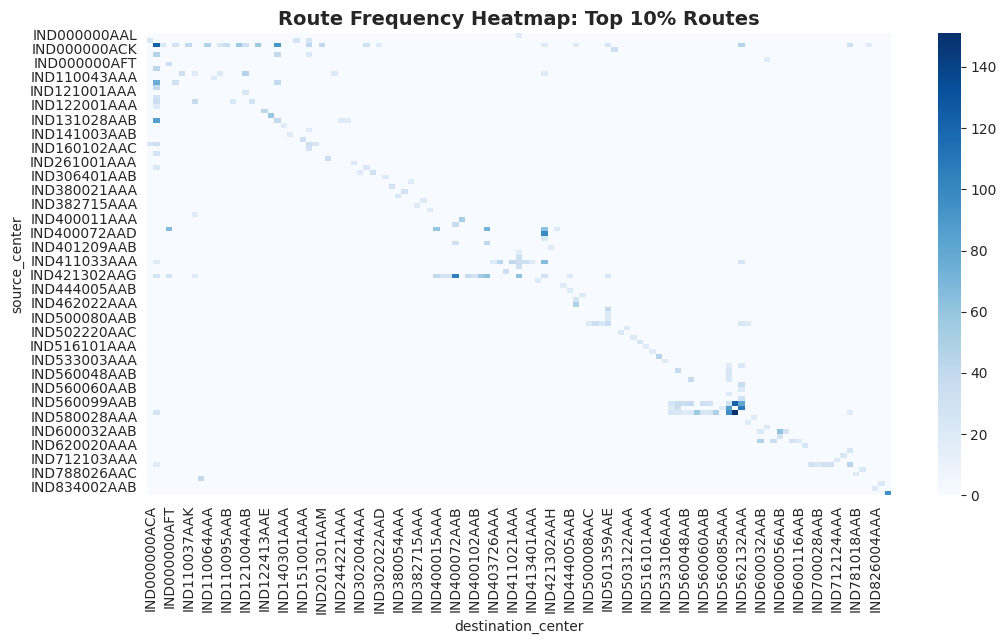

The heatmap highlights the most frequent logistics routes in the network.


In [47]:
flow = df.groupby(['source_center', 'destination_center']).size().reset_index(name = 'count')

plt.figure(figsize = (12,6))
flow_sample = flow[flow['count'] > flow['count'].quantile(0.90)]  # show top 10% routes
sns.heatmap(flow_sample.pivot_table(values = 'count', index = 'source_center',
                                    columns = 'destination_center', fill_value = 0), cmap = 'Blues')
plt.title("Route Frequency Heatmap: Top 10% Routes", fontsize = 14, fontweight = 'bold')
plt.show()

print("The heatmap highlights the most frequent logistics routes in the network.")

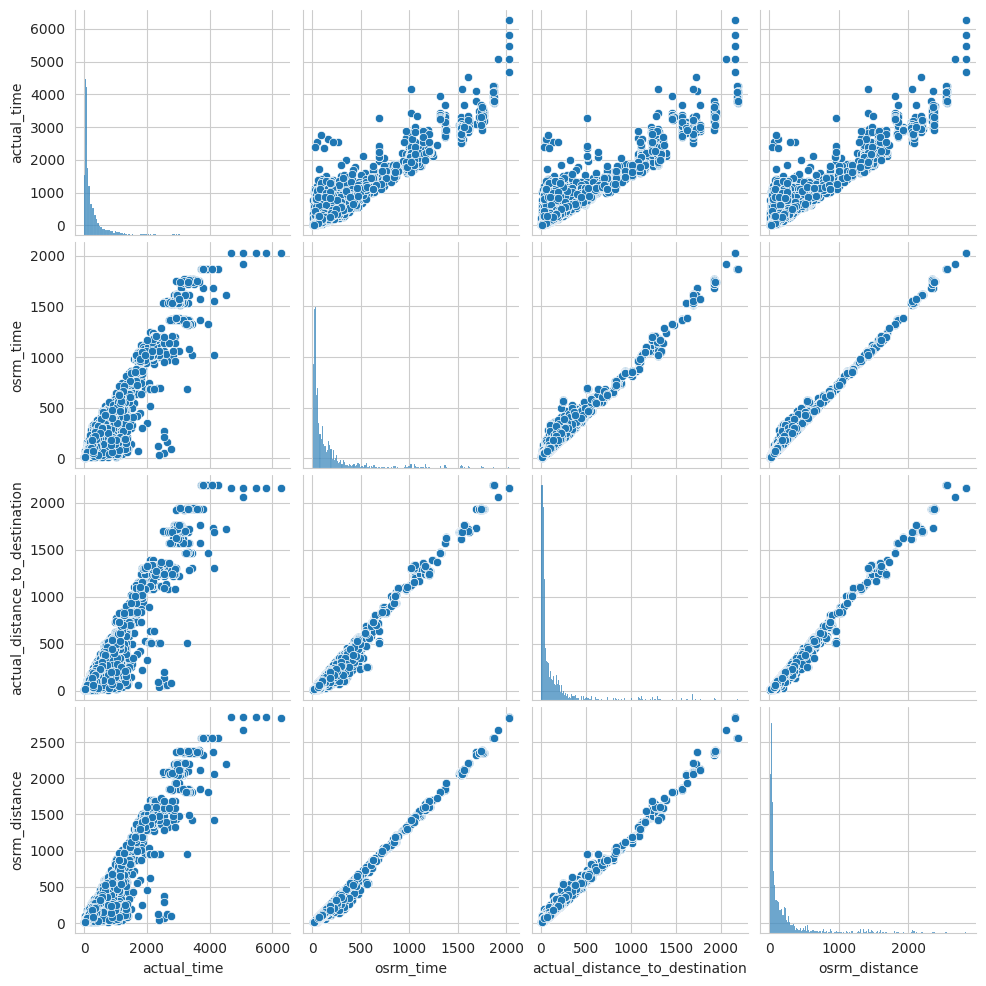

In [48]:
sns.pairplot(df[['actual_time','osrm_time','actual_distance_to_destination','osrm_distance']])
plt.show()

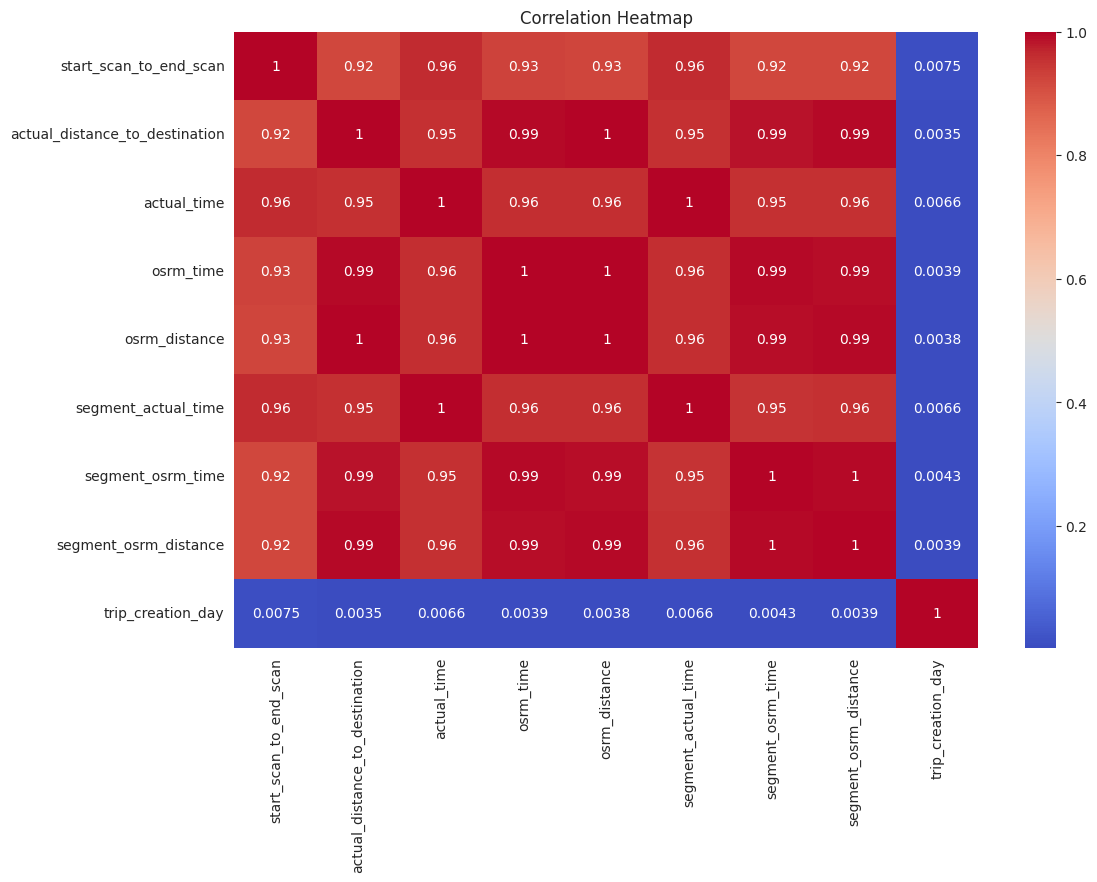

In [49]:
cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance',
        'trip_creation_day']

plt.figure(figsize = (12, 8))
sns.heatmap(df[cols].corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Part C: In-depth Analysis and Feature Engineering:**

## **Part C1: Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required**

In [50]:
df[['od_start_time', 'od_end_time']]

,od_start_time,od_end_time
0,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469
1,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591
2,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733
3,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822
4,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421
...,...,...
14782,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035
14783,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434
14784,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797
14785,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194


In [51]:
df['od_duration_minutes'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60
df

# To drop the original columns od_end_time and od_start_time:
# df = df.drop(columns = ['od_end_time','od_start_time'], axis = 1)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_hour,trip_day,od_duration_minutes
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12,0,Wednesday,0.000000
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12,0,Wednesday,0.000000
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,Haryana,Gurgaon,Bilaspur,HB,2018,September,12,0,Wednesday,0.000000
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Maharashtra,Mumbai Hub,None,None,2018,September,12,0,Wednesday,100.494935
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,Karnataka,Bellary,Dc,None,2018,September,12,0,Wednesday,232.556228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Punjab,Chandigarh,Mehmdpur,H,2018,October,3,23,Wednesday,405.485842
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Haryana,FBD,Balabhgarh,DPC,2018,October,3,23,Wednesday,60.590521
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3,23,Wednesday,0.000000
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,October,3,23,Wednesday,149.831354


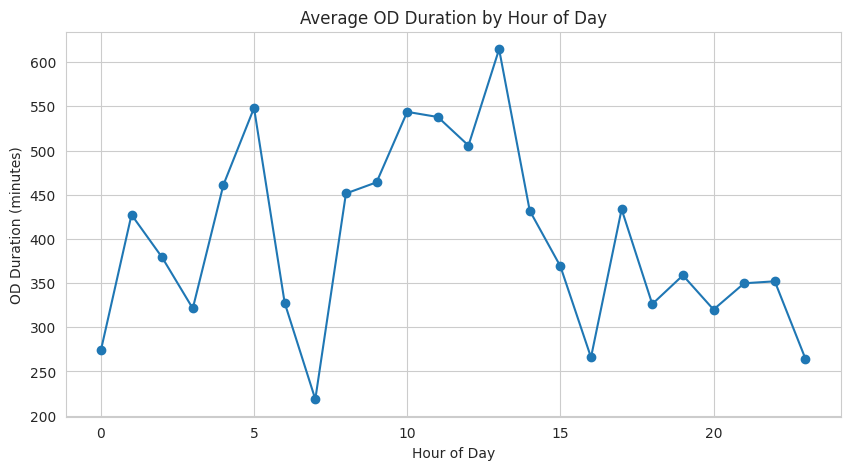

In [52]:
plt.figure(figsize = (10,5))
df.groupby('trip_hour')['od_duration_minutes'].mean().plot(marker = 'o')
plt.title("Average OD Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("OD Duration (minutes)")
plt.grid(True)
plt.show()

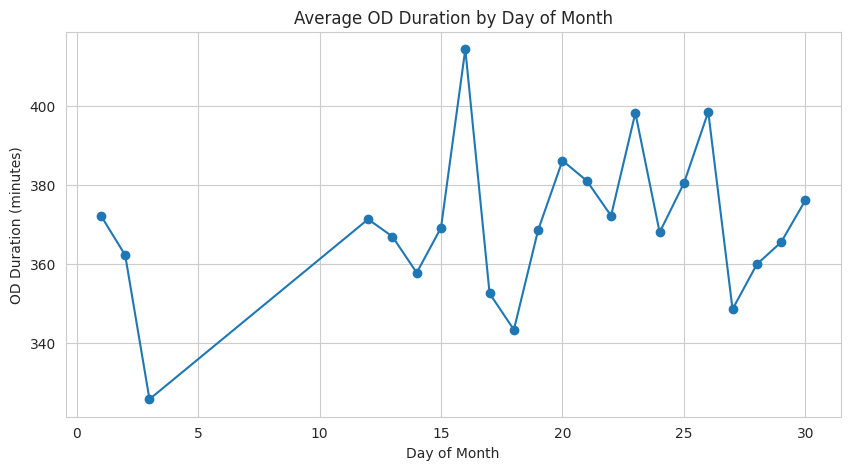

In [53]:
plt.figure(figsize = (10,5))
df.groupby('trip_creation_day')['od_duration_minutes'].mean().plot(marker = 'o')
plt.title("Average OD Duration by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("OD Duration (minutes)")
plt.grid(True)
plt.show()

# **Part C2: Compare the difference between od_duration_minutes and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

In [54]:
from scipy.stats import ttest_rel
import numpy as np

# Filter only missing values
df_valid_trip = df.dropna(subset=['od_duration_minutes', 'start_scan_to_end_scan'])

# Paired t-test
t_stat, p_value = ttest_rel(df_valid_trip['od_duration_minutes'], df_valid_trip['start_scan_to_end_scan'])

print("Paired t-test")
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There IS a significant difference between od_duration_minutes and start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis. There is NO significant difference between od_duration_minutes and start_scan_to_end_scan.")

Paired t-test
t-statistic: -39.060428776171975
p-value: 0.0
Reject the null hypothesis. There IS a significant difference between od_duration_minutes and start_scan_to_end_scan.


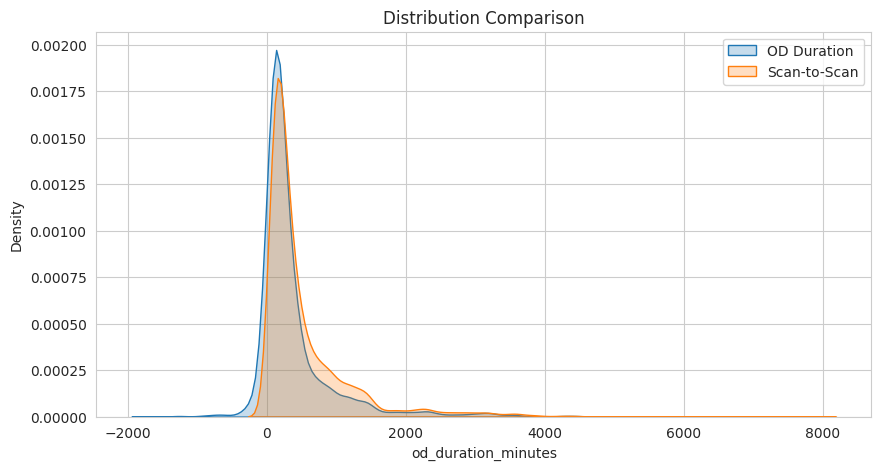

In [55]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['od_duration_minutes'], label = 'OD Duration', shade = True)
sns.kdeplot(df['start_scan_to_end_scan'], label = 'Scan-to-Scan', shade = True)
plt.title("Distribution Comparison")
plt.legend()
plt.show()

# **Part C3: Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [56]:
from scipy.stats import ttest_rel
import numpy as np

# Filter to valid trips: non-missing, positive actual and OSRM segment times
df_valid_trip = df.dropna(subset = ['segment_actual_time', 'segment_osrm_time'])
df_valid_trip = df_valid_trip[(df_valid_trip['segment_actual_time'] > 0) & (df_valid_trip['segment_osrm_time'] > 0)]

t_stat, p_value = ttest_rel(df_valid_trip['segment_actual_time'], df_valid_trip['segment_osrm_time'])
print("Paired t-test")
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. No difference between actual and OSRM total trip time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between actual and OSRM total trip time.")

Paired t-test
t-statistic: 76.72076805715315
p-value: 0.0
Reject the null hypothesis. No difference between actual and OSRM total trip time.


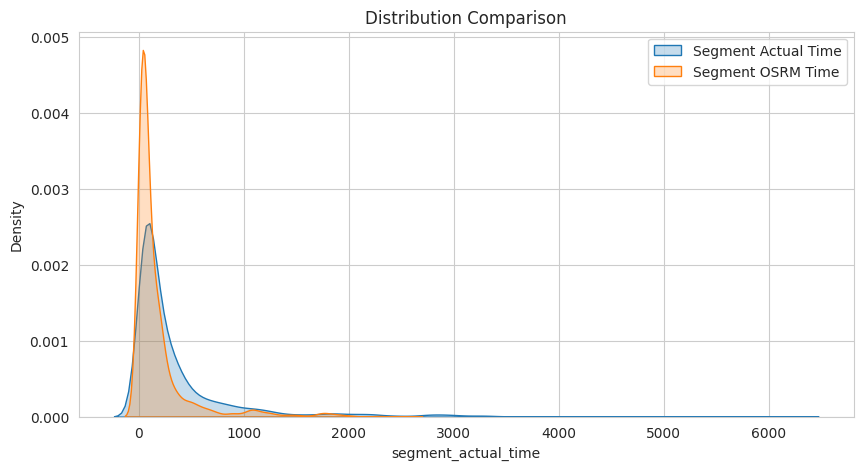

In [57]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['segment_actual_time'], label = 'Segment Actual Time', shade = True)
sns.kdeplot(df['segment_osrm_time'], label = 'Segment OSRM Time', shade = True)
plt.title("Distribution Comparison")
plt.legend()
plt.show()

# **Part C4: Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [58]:
from scipy.stats import ttest_rel
import numpy as np

# Filter to valid trips
df_valid_trip = df.dropna(subset=['actual_time', 'segment_actual_time'])
df_valid_trip = df_valid_trip[(df_valid_trip['actual_time'] > 0) & (df_valid_trip['segment_actual_time'] > 0)]

t_stat, p_value = ttest_rel(df_valid_trip['actual_time'], df_valid_trip['segment_actual_time'])
print("Paired t-test")
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. No difference between total actual and total segment actual trip time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between total actual and total segment actual trip time.")

Paired t-test
t-statistic: 68.26327799172758
p-value: 0.0
Reject the null hypothesis. No difference between total actual and total segment actual trip time.


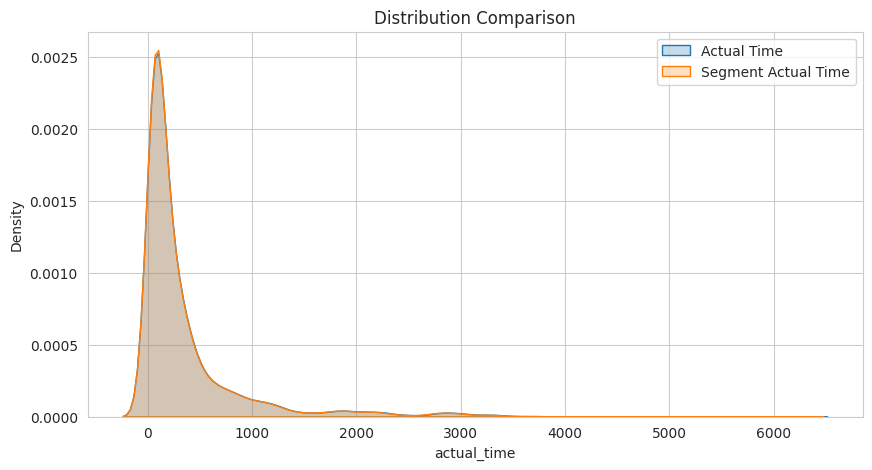

In [59]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['actual_time'], label = 'Actual Time', shade = True)
sns.kdeplot(df['segment_actual_time'], label = 'Segment Actual Time', shade = True)
plt.title("Distribution Comparison")
plt.legend()
plt.show()

# **Part C5: Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [60]:
from scipy.stats import ttest_rel
import numpy as np

# Filter to valid trips
df_valid_trip = df.dropna(subset=['osrm_distance', 'segment_osrm_distance'])
df_valid_trip = df_valid_trip[(df_valid_trip['osrm_distance'] > 0) & (df_valid_trip['segment_osrm_distance'] > 0)]

t_stat, p_value = ttest_rel(df_valid_trip['osrm_distance'], df_valid_trip['segment_osrm_distance'])
print("Paired t-test")
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. No difference between osrm distance and segment osrm distance.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between osrm distance and segment osrm distance.")

Paired t-test
t-statistic: -36.29867790679962
p-value: 1.93254728967576e-276
Reject the null hypothesis. No difference between osrm distance and segment osrm distance.


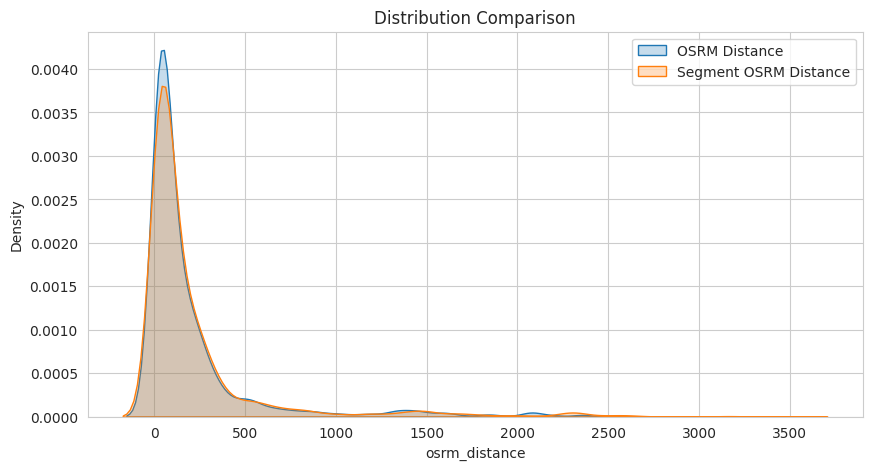

In [61]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['osrm_distance'], label = 'OSRM Distance', shade = True)
sns.kdeplot(df['segment_osrm_distance'], label = 'Segment OSRM Distance', shade = True)
plt.title("Distribution Comparison")
plt.legend()
plt.show()

# **Part C6: Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [62]:
from scipy.stats import ttest_rel
import numpy as np

# Filter to valid trips
df_valid_trip = df.dropna(subset=['osrm_time', 'segment_osrm_time'])
df_valid_trip = df_valid_trip[(df_valid_trip['osrm_time'] > 0) & (df_valid_trip['segment_osrm_time'] > 0)]

t_stat, p_value = ttest_rel(df_valid_trip['osrm_time'], df_valid_trip['segment_osrm_time'])
print("Paired t-test")
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. No difference between osrm time and segment osrm time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between osrm time and segment osrm time.")

Paired t-test
t-statistic: -42.603780126691525
p-value: 0.0
Reject the null hypothesis. No difference between osrm time and segment osrm time.


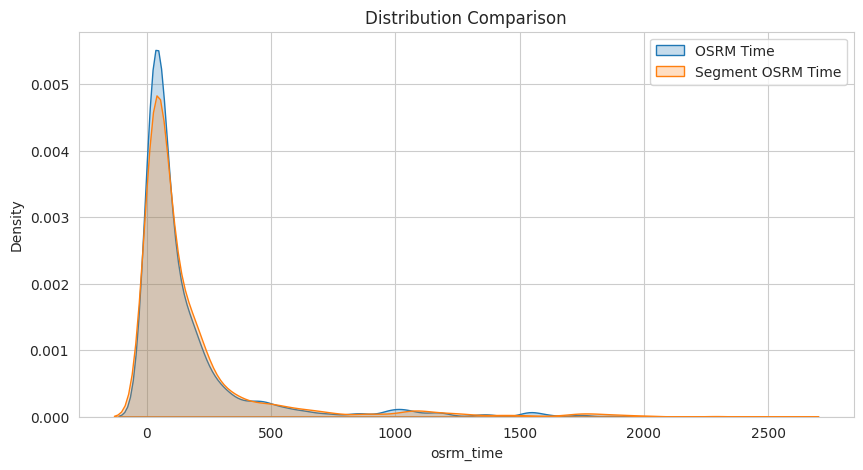

In [63]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['osrm_time'], label = 'OSRM Time', shade = True)
sns.kdeplot(df['segment_osrm_time'], label = 'Segment OSRM Time', shade = True)
plt.title("Distribution Comparison")
plt.legend()
plt.show()

# **Suggestion: Reusable Paired t-test Function**

from scipy.stats import ttest_rel

def paired_test(df, col1, col2, alpha = 0.05):
    print(f"\n---- Paired t-test: {col1} vs {col2} ----")

    # Drop missing values
    df_valid = df.dropna(subset=[col1, col2])

    # Run paired t-test
    t_stat, p_value = ttest_rel(df_valid[col1], df_valid[col2])
    print("t-statistic:", t_stat)
    print("p-value:", p_value)

    if p_value < alpha:
        print(f"Reject H₀ → Significant difference between {col1} and {col2}.")
    else:
        print(f"Fail to reject H₀ → No significant difference between {col1} and {col2}.")

paired_test(df, 'actual_time', 'osrm_time')

paired_test(df, 'actual_time', 'segment_actual_time')

paired_test(df, 'osrm_distance', 'segment_osrm_distance')

paired_test(df, 'osrm_time', 'segment_osrm_time')

# **Part D: Handling Outliers:**

# **Part D1: Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis**

In [64]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_day,trip_hour,od_duration_minutes
count,14787,14787,14787,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.0,14787.000000,14787.000000,14787.000000
mean,2018-09-22 12:26:28.269885696,2018-09-22 14:39:56.325738496,2018-09-22 20:49:39.860267008,529.429025,164.291904,356.306012,161.669575,204.637575,353.059174,180.511598,222.705466,2018.0,18.375127,12.456212,369.725575
min,2018-09-12 00:00:16.535741,2018-09-12 00:01:00.113710,2018-09-12 00:50:10.814399,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,2018.0,1.000000,0.000000,-1690.466476
25%,2018-09-17 02:38:18.128431872,2018-09-17 05:23:23.166219520,2018-09-17 11:01:12.272902912,149.000000,22.840056,67.000000,29.000000,30.875600,66.000000,30.000000,32.578850,2018.0,14.000000,4.000000,95.109258
50%,2018-09-22 03:39:19.609193984,2018-09-22 05:37:28.196830976,2018-09-22 12:46:03.655276032,279.000000,48.376934,148.000000,60.000000,65.575600,147.000000,65.000000,69.784200,2018.0,19.000000,14.000000,196.018178
75%,2018-09-27 19:23:14.074359552,2018-09-27 20:42:21.489692672,2018-09-28 02:23:08.496503040,632.000000,163.703311,367.000000,168.000000,207.159550,364.000000,184.000000,216.560600,2018.0,25.000000,20.000000,402.681740
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,2187.483994,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,2018.0,30.000000,23.000000,7898.551955
std,NaN,NaN,NaN,658.254936,305.677608,561.517936,272.405903,370.951895,556.365911,314.679279,416.846279,0.0,7.882198,7.987387,576.299537


In [65]:
df.columns

Index(['trip_uuid', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'destination',
       'destination_state', 'destination_city', 'destination_place',
       'destination_code', 'source', 'source_state', 'source_city',
       'source_place', 'source_code', 'trip_creation_year',
       'trip_creation_month', 'trip_creation_day', 'trip_hour', 'trip_day',
       'od_duration_minutes'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_start_time                   14787 non-null  datetime64[ns]
 10  od_end_time                     14787 non-null  datetime64[ns]
 11  st

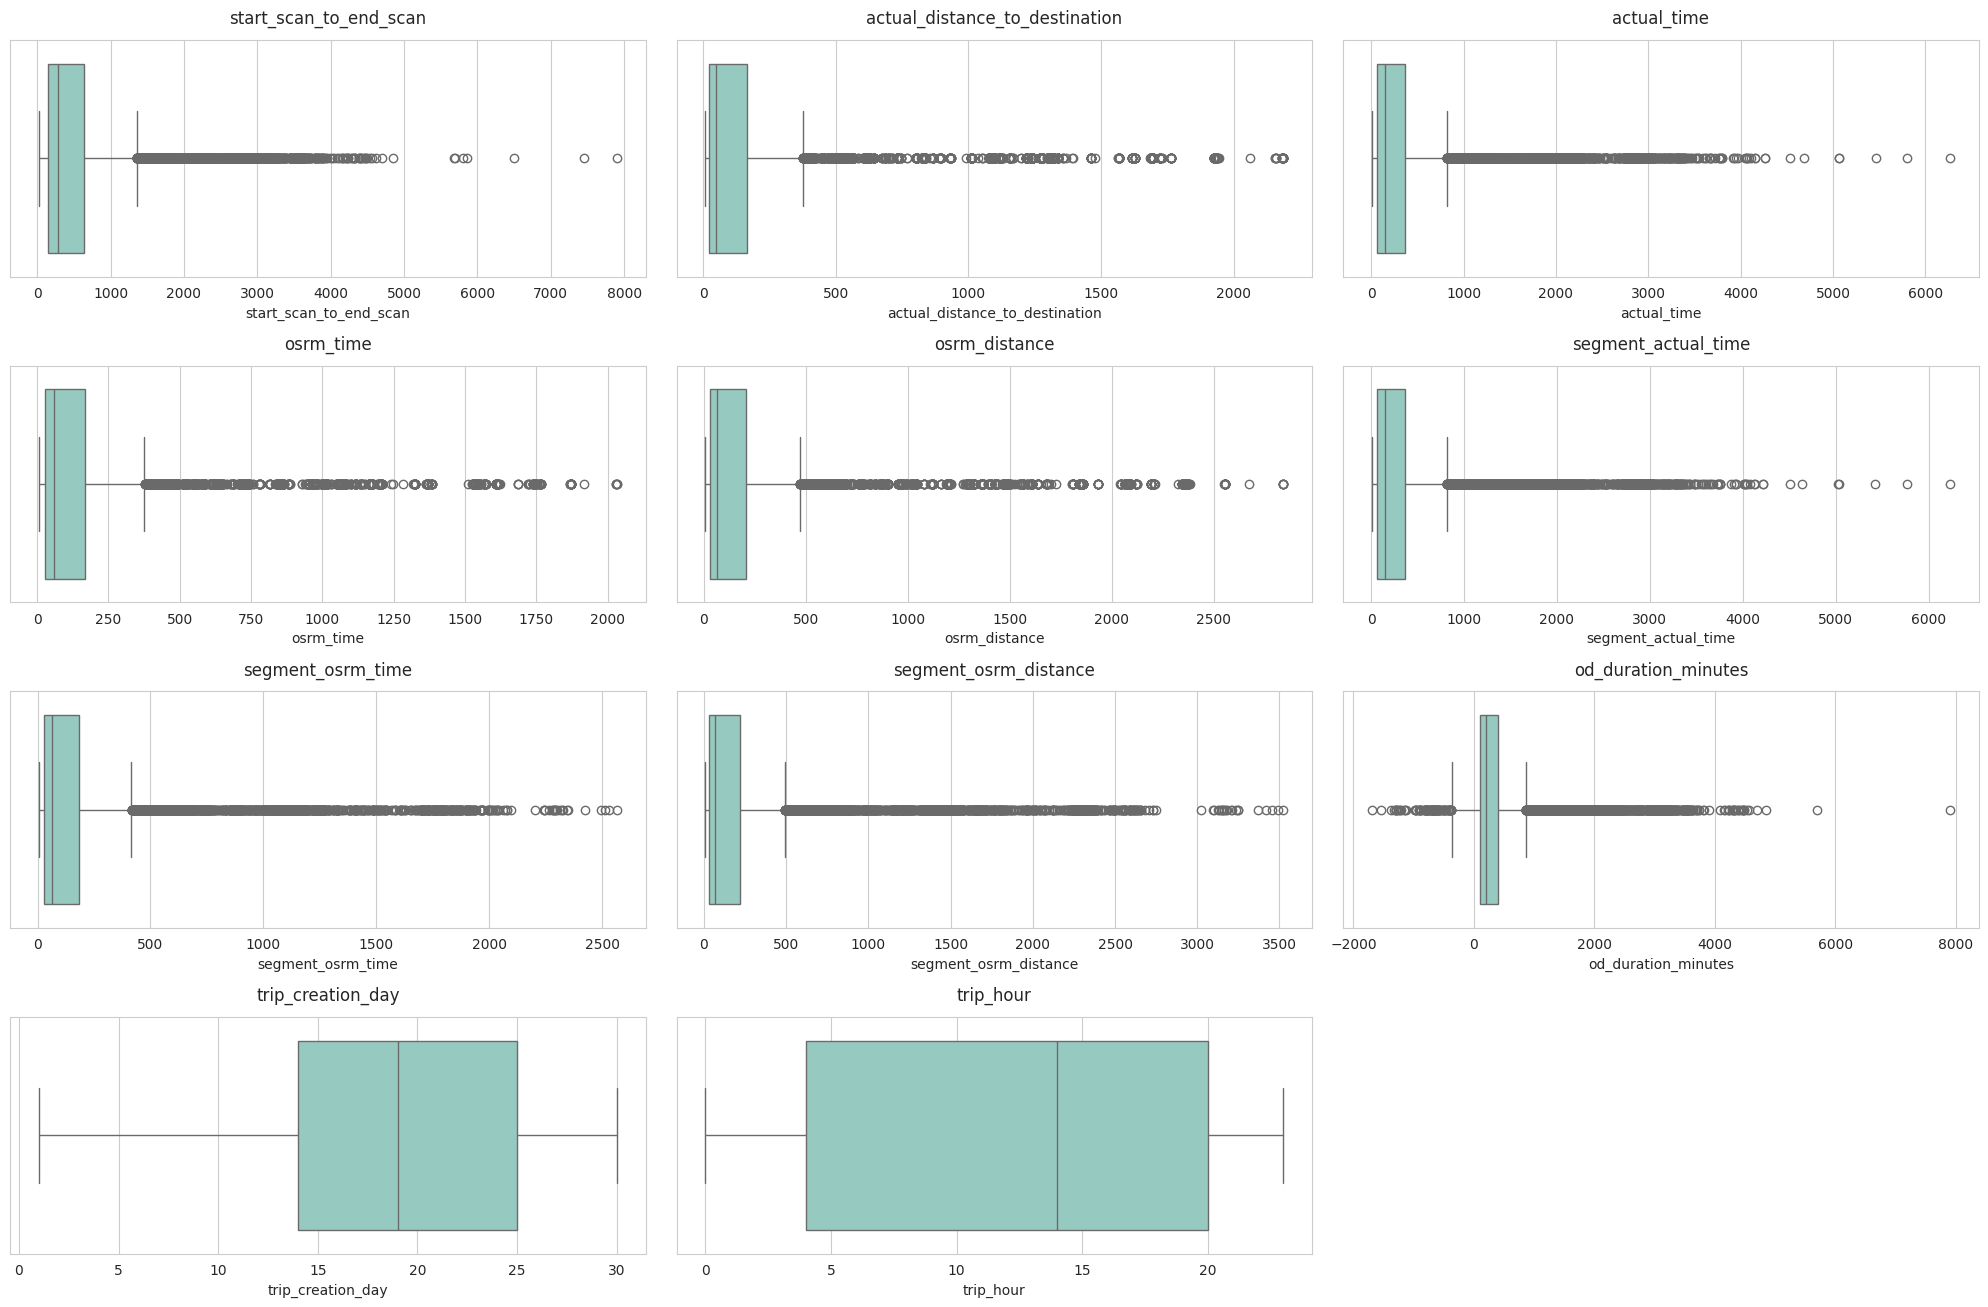

In [67]:
cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
        'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
        'segment_osrm_distance', 'od_duration_minutes', 'trip_creation_day','trip_hour']

fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 16))
axs = axs.flatten()       # Flatten for easier indexing

# Plot boxplots
for index in range(len(cols)):
    sns.boxplot(data = df, x = cols[index], ax = axs[index], palette = 'Set3')
    axs[index].set_title(cols[index], fontsize = 12, pad = 12)

# Delete unused axes
for j in range(len(cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# **Part D2: Handle the outliers on all columns except od_duration_minutes using the IQR method**

In [68]:
df_copy = df.copy()

cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
        'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
        'segment_osrm_distance', 'trip_creation_day', 'trip_hour']

for i in cols:
    Q1 = df_copy[i].quantile(.25)
    Q3 = df_copy[i].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    print('lower limit of',i,'=',lower_bound)
    print('upper limit of',i,'=',upper_bound)
    print("\n")
    df_copy = df_copy[~((df_copy[i] < lower_bound)|(df_copy[i] > upper_bound))]

df_copy

lower limit of start_scan_to_end_scan = -575.5
upper limit of start_scan_to_end_scan = 1356.5


lower limit of actual_distance_to_destination = -131.50906283880335
upper limit of actual_distance_to_destination = 277.17627495383044


lower limit of actual_time = -221.0
upper limit of actual_time = 531.0


lower limit of osrm_time = -82.0
upper limit of osrm_time = 206.0


lower limit of osrm_distance = -87.61360000000002
upper limit of osrm_distance = 218.55020000000002


lower limit of segment_actual_time = -131.0
upper limit of segment_actual_time = 365.0


lower limit of segment_osrm_time = -53.0
upper limit of segment_osrm_time = 155.0


lower limit of segment_osrm_distance = -43.950350000000014
upper limit of segment_osrm_distance = 144.05165


lower limit of trip_creation_day = -2.5
upper limit of trip_creation_day = 41.5


lower limit of trip_hour = -20.0
upper limit of trip_hour = 44.0




,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_hour,trip_day,od_duration_minutes
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12,0,Wednesday,0.000000
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Maharashtra,Mumbai Hub,None,None,2018,September,12,0,Wednesday,100.494935
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,...,Tamil Nadu,Chennai,Poonamallee,None,2018,September,12,0,Wednesday,0.000000
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,...,Tamil Nadu,Chennai,Chrompet,DPC,2018,September,12,0,Wednesday,98.005634
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,...,Karnataka,HBR Layout PC,None,None,2018,September,12,0,Wednesday,176.448324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781,trip-153861091843037040,test,2018-10-03 23:55:18.430664,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-10-03 23:55:18.430664,...,Maharashtra,Mumbai Hub,None,None,2018,October,3,23,Wednesday,88.215987
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Punjab,Chandigarh,Mehmdpur,H,2018,October,3,23,Wednesday,405.485842
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Haryana,FBD,Balabhgarh,DPC,2018,October,3,23,Wednesday,60.590521
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3,23,Wednesday,0.000000


# **Handle Outliers on od_duration_minutes using Percentile Capping Method:**

In [69]:
# Percentile Capping Method

lower_cap = df_copy['od_duration_minutes'].quantile(0.01)
upper_cap = df_copy['od_duration_minutes'].quantile(0.99)

df_copy['od_duration_minutes'] = df_copy['od_duration_minutes'].clip(lower_cap, upper_cap)
df_copy

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_hour,trip_day,od_duration_minutes
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12,0,Wednesday,0.000000
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Maharashtra,Mumbai Hub,None,None,2018,September,12,0,Wednesday,100.494935
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,...,Tamil Nadu,Chennai,Poonamallee,None,2018,September,12,0,Wednesday,0.000000
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,...,Tamil Nadu,Chennai,Chrompet,DPC,2018,September,12,0,Wednesday,98.005634
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,...,Karnataka,HBR Layout PC,None,None,2018,September,12,0,Wednesday,176.448324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781,trip-153861091843037040,test,2018-10-03 23:55:18.430664,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-10-03 23:55:18.430664,...,Maharashtra,Mumbai Hub,None,None,2018,October,3,23,Wednesday,88.215987
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Punjab,Chandigarh,Mehmdpur,H,2018,October,3,23,Wednesday,405.485842
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Haryana,FBD,Balabhgarh,DPC,2018,October,3,23,Wednesday,60.590521
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3,23,Wednesday,0.000000


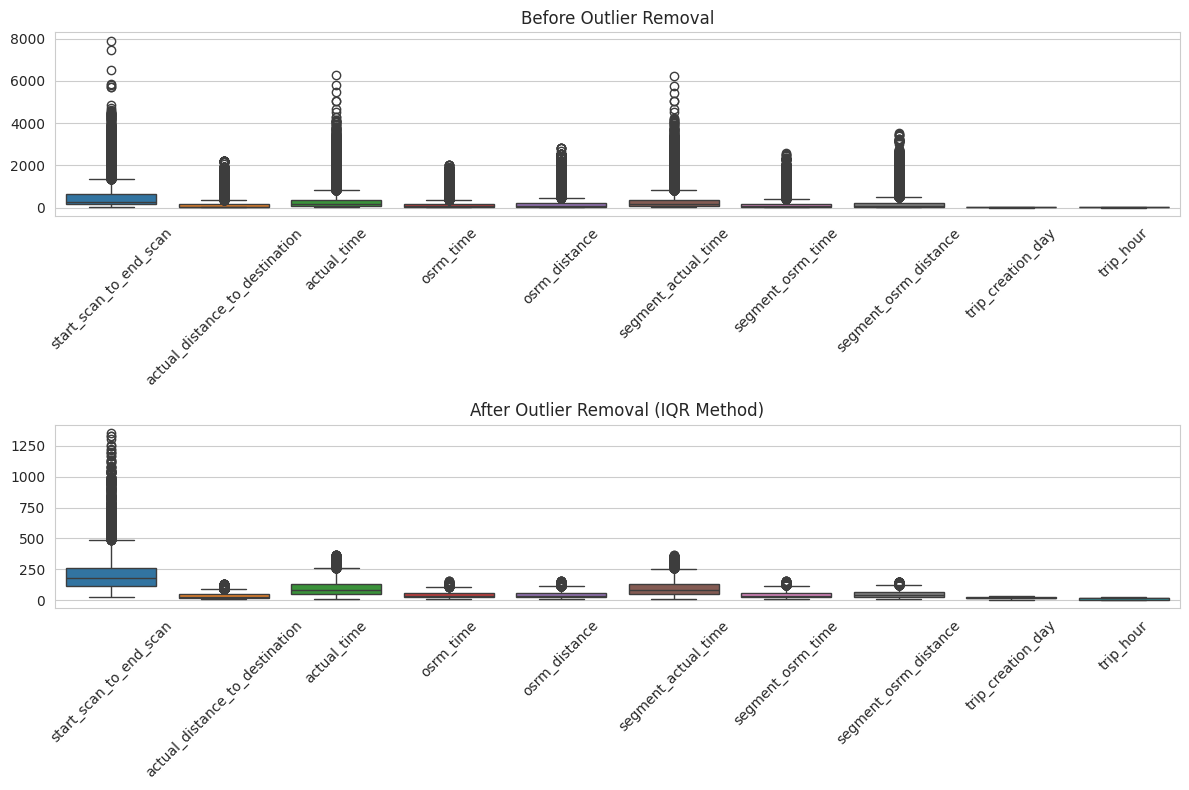

In [70]:
fig, axes = plt.subplots(2, 1, figsize = (12, 8))

sns.boxplot(data = df[cols], ax = axes[0])
axes[0].set_title('Before Outlier Removal')
axes[0].tick_params(axis = 'x', rotation = 45)

sns.boxplot(data = df_copy[cols], ax = axes[1])
axes[1].set_title('After Outlier Removal (IQR Method)')
axes[1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

# **Part E: Encoding and Scaling:**

In [71]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 1 to 14786
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       9332 non-null   object        
 1   data                            9332 non-null   object        
 2   trip_creation_time              9332 non-null   datetime64[ns]
 3   route_schedule_uuid             9332 non-null   object        
 4   route_type                      9332 non-null   object        
 5   source_center                   9332 non-null   object        
 6   source_name                     9332 non-null   object        
 7   destination_center              9332 non-null   object        
 8   destination_name                9332 non-null   object        
 9   od_start_time                   9332 non-null   datetime64[ns]
 10  od_end_time                     9332 non-null   datetime64[ns]
 11  start_sc

# **Part E1: Do one-hot encoding of categorical variables (like route_type)**

In [72]:
# One-Hot Encoding and Label Encoding

# Make a copy to avoid modifying original
df_encoded = df_copy.copy()

from sklearn.preprocessing import LabelEncoder

# High-cardinality columns → Label Encoding
label_encoding_cols = ['trip_day', 'source_center', 'source_name', 'source_city', 'source_place', 'source_code',
                       'destination_center', 'destination_name', 'destination_city', 'destination_place', 'destination_code']

# Low-cardinality columns → One-Hot Encoding
one_hot_encoding_cols = ['route_type', 'trip_creation_month', 'source_state', 'destination_state']

le = LabelEncoder()

for col in label_encoding_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


df_encoded = pd.get_dummies(df_encoded, columns = one_hot_encoding_cols, drop_first = True)

df_final = df_encoded.copy()
df_final

,trip_uuid,data,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,destination_state_Mizoram,destination_state_Nagaland,destination_state_Orissa,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,474,242,497,249,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,...,False,False,False,False,False,False,False,False,False,False
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,279,495,293,535,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,False,False,False,False,False,False,False,False,False,False
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,517,170,547,171,2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,...,False,False,False,False,False,True,False,False,False,False
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,514,160,546,179,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,...,False,False,False,False,False,True,False,False,False,False
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,458,305,480,311,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781,trip-153861091843037040,test,2018-10-03 23:55:18.430664,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,279,495,293,535,2018-10-03 23:55:18.430664,2018-10-04 01:23:31.389882,...,False,False,False,False,False,False,False,False,False,False
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,96,150,98,154,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,...,False,False,False,True,False,False,False,False,False,False
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,41,248,39,261,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,...,False,False,False,False,False,False,False,False,False,False
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,126,400,125,410,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,...,False,False,False,False,False,False,False,True,False,False


# **Part E2: Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [73]:
# MinMax Scaler and Standard Scaler

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Make a copy to avoid altering df_final
df_scaled = df_final.copy()

minmax_scaler_cols = ['start_scan_to_end_scan', 'trip_creation_year', 'trip_creation_day', 'trip_hour']

standard_scaler_cols = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                        'segment_osrm_time', 'segment_osrm_distance', 'od_duration_minutes']

# Initialize the scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler
df_scaled[minmax_scaler_cols] = minmax_scaler.fit_transform(df_scaled[minmax_scaler_cols])

# Apply StandardScaler
df_scaled[standard_scaler_cols] = standard_scaler.fit_transform(df_scaled[standard_scaler_cols])

final_df = df_scaled.copy()
final_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,destination_state_Mizoram,destination_state_Nagaland,destination_state_Orissa,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,474,242,497,249,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,...,False,False,False,False,False,False,False,False,False,False
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,279,495,293,535,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,False,False,False,False,False,False,False,False,False,False
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,517,170,547,171,2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,...,False,False,False,False,False,True,False,False,False,False
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,514,160,546,179,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,...,False,False,False,False,False,True,False,False,False,False
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,458,305,480,311,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781,trip-153861091843037040,test,2018-10-03 23:55:18.430664,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,279,495,293,535,2018-10-03 23:55:18.430664,2018-10-04 01:23:31.389882,...,False,False,False,False,False,False,False,False,False,False
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,96,150,98,154,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,...,False,False,False,True,False,False,False,False,False,False
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,41,248,39,261,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,...,False,False,False,False,False,False,False,False,False,False
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,126,400,125,410,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,...,False,False,False,False,False,False,False,True,False,False


# **Insights and Recommendations:**

1. Most trips use carting as delivery type compared to Full Truck Load.

2. Bengaluru, Mumbai and Gurgaon are both the top contributors along with Bhiwandi, Delhi, Hyderabad, Chennai, Pune and Chandigarh thereby indicating that the Southern, Western and Northern corridors as the top performing ones.

3. The top states with intra - state trips are Maharashtra, Karnataka,Tamil Nadu, Telengana, UP and among inter-state trips are Karnaataka, Maharashtra, Tamil Nadu, Telengana and Andhra Pradesh.

4. The top cities in intra - city trips are Bangalore, Mumbai, and Hyderabad while the top cities for inter - city trips are Mumbai, Bhiwandi and Guragon.

5. Due to delays caused by unprecedented traffic or other delays, OSRM seems to be calculating time and distance less than what actual scenario.

6. Carting is prefered more in midnight orders.

7. Most of the products were delivered on Wednesday followed by Saturday and Thursday. Least number of products were delivered on Sunday thereby indicating that customers prefer the deliveries of orders during weekdays.

8. Many features show right-skewed distributions, particularly time and distance-related variables. Strong positive correlations observed between actual time, OSRM time, and distance-related features.

9. Since there is significant dfference between the time and distances calculated by OSRM with actual time and distances, it might make sense to revisit the information which is fed to the routing engine for trip planning.

10. The number of hubs could be increased in the states/cities which have highest contribution to traffic. FTL should be executed more for faster and on time deleveries.